<a href="https://colab.research.google.com/github/kamillyruseler/web-scraping/blob/main/Raspagem_de_dados_dep_estaduais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aumentando a conscientização sobre os deputados estaduais através de Web Scrapping**
*Uma análise da concentração de renda, nível de escolaridade, profissão atual, naturalidade e idade, para embasar a intenção de voto aos deputados estaduais e refletir sobre o nível de qualificação e elitismo nas eleições brasileiras*


**Contexto**:

De acordo com um [estudo](https://jornal.usp.br/atualidades/brasil-ocupa-o-2o-lugar-em-pesquisa-sobre-percepcao-de-realidade/), que já foi chamado de Índice de Ignorância, os brasileiros ocupam a 2ª colocação sobre percepção da realidade, resultado este, que é influenciado pela ascensão das fake news e do sensacionalismo.

Como consequência, podemos ter uma falta de conhecimento sobre o processo eleitoral brasileiro, o que impacta na qualidade da democracia no Brasil.

A falta de conhecimento sobre as eleições se observa em um [estudo](https://www.estadao.com.br/politica/eleitor-quer-renovacao-no-congresso-mas-nao-se-lembra-em-quem-votou/) feito pelo Estadão, em que 55% das pessoas declararam não saber o que faz um deputado. Além disso, dois em cada três eleitores (66%) afirmaram não se lembrar em quem votaram para deputado em 2018.

Pensando nisso, surgiu a ideia de auxiliar os eleitores a conhecerem os deputados estaduais, através da análise de dados feitas com técnicas de Web Scrapping.

**Materiais e métodos**:

Fonte dos dados: [Estadão - Eleições 2022](https://www.estadao.com.br/politica/eleicoes/2022/apuracao/primeiro-turno/deputado-estadual/sc/)

As páginas de detalhes de cada candidato seguiam o mesmo padrão "nome-sobrenome/numero", portanto, fizemos uma função **criar_link**, para gerar os links de cada candidato, com base no nosso DataFrame Pandas.

Os dados analisados são:

*   Nome do candidato
*   Partido
*   Quantidade de votos
*   Número do candidato
*   Naturalidade
*   Valor em bens (declarados)
*   Idade
*   Educação
*   Ocupação





# Deputados Estaduais

In [ ]:
# @title HTML da página do Estadão
pagina_html = """<div class="listagem"><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/ana-campagnolo/22822/" title="Ana Campagnolo"><span>01</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Ana Campagnolo</span></a><span>4,88%</span></div><div class="informs"><div><span>Nº <strong>22822</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>196.571</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/luciane-carminatti/13601/" title="Luciane Carminatti"><span>02</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Luciane Carminatti</span></a><span>2,3%</span></div><div class="informs"><div><span>Nº <strong>13601</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>92.478</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/antidio-lunelli/15222/" title="Antídio Lunelli"><span>03</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Antídio Lunelli</span></a><span>1,85%</span></div><div class="informs"><div><span>Nº <strong>15222</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>74.500</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sargento-lima/22122/" title="Sargento Lima"><span>04</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Sargento Lima</span></a><span>1,77%</span></div><div class="informs"><div><span>Nº <strong>22122</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>71.185</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/mauro-de-nadal/15220/" title="Mauro De Nadal"><span>05</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Mauro De Nadal</span></a><span>1,66%</span></div><div class="informs"><div><span>Nº <strong>15220</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>67.065</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/mauricio-eskudlark/22222/" title="Mauricio Eskudlark"><span>06</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Mauricio Eskudlark</span></a><span>1,63%</span></div><div class="informs"><div><span>Nº <strong>22222</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>65.638</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jerry-comper/15010/" title="Jerry Comper"><span>07</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Jerry Comper</span></a><span>1,59%</span></div><div class="informs"><div><span>Nº <strong>15010</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>64.145</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/paulinha/19010/" title="Paulinha"><span>08</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Paulinha</span></a><span>1,46%</span></div><div class="informs"><div><span>Nº <strong>19010</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PODE</strong></span></div><div><span>Coligação <strong>PODE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>58.694</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/ze-milton/11234/" title="Zé Milton"><span>09</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Zé Milton</span></a><span>1,4%</span></div><div class="informs"><div><span>Nº <strong>11234</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>56.585</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/mario-motta/55555/" title="Mario Motta"><span>10</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Mario Motta</span></a><span>1,4%</span></div><div class="informs"><div><span>Nº <strong>55555</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>56.363</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jesse-lopes/22456/" title="Jessé Lopes"><span>11</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Jessé Lopes</span></a><span>1,37%</span></div><div class="informs"><div><span>Nº <strong>22456</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>55.013</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/fernando-krelling/15655/" title="Fernando Krelling"><span>12</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Fernando Krelling</span></a><span>1,35%</span></div><div class="informs"><div><span>Nº <strong>15655</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>54.320</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/julio-garcia/55111/" title="Julio Garcia"><span>13</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Julio Garcia</span></a><span>1,24%</span></div><div class="informs"><div><span>Nº <strong>55111</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>49.958</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marcos-vieira/45699/" title="Marcos Vieira"><span>14</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Marcos Vieira</span></a><span>1,2%</span></div><div class="informs"><div><span>Nº <strong>45699</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSDB</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>48.466</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/carlos-humberto/22444/" title="Carlos Humberto"><span>15</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Carlos Humberto</span></a><span>1,15%</span></div><div class="informs"><div><span>Nº <strong>22444</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>46.445</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/altair-silva/11130/" title="Altair Silva"><span>16</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Altair Silva</span></a><span>1,14%</span></div><div class="informs"><div><span>Nº <strong>11130</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>46.086</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/volnei-weber/15000/" title="Volnei Weber"><span>17</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Volnei Weber</span></a><span>1,14%</span></div><div class="informs"><div><span>Nº <strong>15000</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>45.995</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/ivan-naatz/22555/" title="Ivan Naatz"><span>18</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Ivan Naatz</span></a><span>1,12%</span></div><div class="informs"><div><span>Nº <strong>22555</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>45.304</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/camilo-martins/19369/" title="Camilo Martins"><span>19</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Camilo Martins</span></a><span>1,12%</span></div><div class="informs"><div><span>Nº <strong>19369</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PODE</strong></span></div><div><span>Coligação <strong>PODE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>44.925</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sergio-motta/10123/" title="Sergio Motta"><span>20</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Sergio Motta</span></a><span>1,11%</span></div><div class="informs"><div><span>Nº <strong>10123</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>44.666</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/berlanda/22022/" title="Berlanda"><span>21</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Berlanda</span></a><span>1,03%</span></div><div class="informs"><div><span>Nº <strong>22022</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>41.488</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marquito-marcos-jose-abreu/50150/" title="Marquito Marcos José Abreu"><span>22</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Marquito Marcos José Abreu</span></a><span>1%</span></div><div class="informs"><div><span>Nº <strong>50150</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSOL</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>40.329</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dr-vicente/45999/" title="Dr. Vicente"><span>23</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Dr. Vicente</span></a><span>0,99%</span></div><div class="informs"><div><span>Nº <strong>45999</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSDB</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>39.797</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marcius-machado/22123/" title="Marcius Machado"><span>24</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Marcius Machado</span></a><span>0,99%</span></div><div class="informs"><div><span>Nº <strong>22123</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>39.749</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/neodi-saretta/13120/" title="Neodi Saretta"><span>25</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Neodi Saretta</span></a><span>0,96%</span></div><div class="informs"><div><span>Nº <strong>13120</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>38.729</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/napoleao-bernardes/55777/" title="Napoleão Bernardes"><span>26</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Napoleão Bernardes</span></a><span>0,92%</span></div><div class="informs"><div><span>Nº <strong>55777</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>36.923</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/fabiano-da-luz/13500/" title="Fabiano Da Luz"><span>27</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Fabiano Da Luz</span></a><span>0,87%</span></div><div class="informs"><div><span>Nº <strong>13500</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>34.972</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/delegado-egidio-ferrari/14181/" title="Delegado Egidio Ferrari"><span>28</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Delegado Egidio Ferrari</span></a><span>0,87%</span></div><div class="informs"><div><span>Nº <strong>14181</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>34.912</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/tiago-zilli/15789/" title="Tiago Zilli"><span>29</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Tiago Zilli</span></a><span>0,84%</span></div><div class="informs"><div><span>Nº <strong>15789</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>33.733</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jair-miotto/44104/" title="Jair Miotto"><span>30</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Jair Miotto</span></a><span>0,84%</span></div><div class="informs"><div><span>Nº <strong>44104</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>33.682</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/massocco/22150/" title="Massocco"><span>31</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Massocco</span></a><span>0,79%</span></div><div class="informs"><div><span>Nº <strong>22150</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>31.659</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/pepe-collaco/11223/" title="Pepê Collaço"><span>32</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Pepê Collaço</span></a><span>0,72%</span></div><div class="informs"><div><span>Nº <strong>11223</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>28.809</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rodrigo-minotto/12345/" title="Rodrigo Minotto"><span>33</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Rodrigo Minotto</span></a><span>0,71%</span></div><div class="informs"><div><span>Nº <strong>12345</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>28.685</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/reporter-sergio-guimaraes/44500/" title="Repórter Sérgio Guimarães"><span>34</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Repórter Sérgio Guimarães</span></a><span>0,69%</span></div><div class="informs"><div><span>Nº <strong>44500</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>27.977</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/oscar-gutz/22470/" title="Oscar Gutz"><span>35</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Oscar Gutz</span></a><span>0,67%</span></div><div class="informs"><div><span>Nº <strong>22470</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>26.812</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/padre-pedro/13987/" title="Padre Pedro"><span>36</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Padre Pedro</span></a><span>0,67%</span></div><div class="informs"><div><span>Nº <strong>13987</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>26.803</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marcos-da-rosa/44022/" title="Marcos Da Rosa"><span>37</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Marcos Da Rosa</span></a><span>0,64%</span></div><div class="informs"><div><span>Nº <strong>44022</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>25.845</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/soratto/22500/" title="Soratto"><span>38</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Soratto</span></a><span>0,64%</span></div><div class="informs"><div><span>Nº <strong>22500</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>25.622</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/lucas-neves/19282/" title="Lucas Neves"><span>39</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Lucas Neves</span></a><span>0,57%</span></div><div class="informs"><div><span>Nº <strong>19282</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PODE</strong></span></div><div><span>Coligação <strong>PODE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>23.053</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/matheus-cadorin/30001/" title="Matheus Cadorin"><span>40</span><span><div style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);"></div></span><span>Matheus Cadorin</span></a><span>0,31%</span></div><div class="informs"><div><span>Nº <strong>30001</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>12.390</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/acelio-casagrande/45100/" title="Acélio Casagrande"><span>41</span><span>Acélio Casagrande</span></a><span>0,97%</span></div><div class="informs"><div><span>Nº <strong>45100</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSDB</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>39.032</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/saulo-sperotto/45222/" title="Saulo Sperotto"><span>42</span><span>Saulo Sperotto</span></a><span>0,7%</span></div><div class="informs"><div><span>Nº <strong>45222</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSDB</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>28.114</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/pedrao/11123/" title="Pedrão"><span>43</span><span>Pedrão</span></a><span>0,68%</span></div><div class="informs"><div><span>Nº <strong>11123</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>27.344</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/emerson-stein/15100/" title="Emerson Stein"><span>44</span><span>Emerson Stein</span></a><span>0,62%</span></div><div class="informs"><div><span>Nº <strong>15100</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>25.063</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/laercio-schuster/44111/" title="Laércio Schuster"><span>45</span><span>Laércio Schuster</span></a><span>0,61%</span></div><div class="informs"><div><span>Nº <strong>44111</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>24.605</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/osmar-teixeira/77777/" title="Osmar Teixeira"><span>46</span><span>Osmar Teixeira</span></a><span>0,61%</span></div><div class="informs"><div><span>Nº <strong>77777</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>SOLIDARIEDADE</strong></span></div><div><span>Coligação <strong>SOLIDARIEDADE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>24.512</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/ze-caramori/55123/" title="Zé Caramori"><span>47</span><span>Zé Caramori</span></a><span>0,61%</span></div><div class="informs"><div><span>Nº <strong>55123</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>24.394</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/constancio-maciel/44123/" title="Constancio Maciel"><span>48</span><span>Constancio Maciel</span></a><span>0,59%</span></div><div class="informs"><div><span>Nº <strong>44123</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>23.614</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/gerri-da-consoli/55155/" title="Gerri Da Consoli"><span>49</span><span>Gerri Da Consoli</span></a><span>0,56%</span></div><div class="informs"><div><span>Nº <strong>55155</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>22.668</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/mauricio-peixer/22620/" title="Maurício Peixer"><span>50</span><span>Maurício Peixer</span></a><span>0,55%</span></div><div class="informs"><div><span>Nº <strong>22620</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>22.028</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/a-alex-brasil/22000/" title="A Alex Brasil"><span>51</span><span>A Alex Brasil</span></a><span>0,5%</span></div><div class="informs"><div><span>Nº <strong>22000</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>20.271</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rosi-maldaner/15015/" title="Rosi Maldaner"><span>52</span><span>Rosi Maldaner</span></a><span>0,5%</span></div><div class="informs"><div><span>Nº <strong>15015</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>20.189</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/daniel-candido/19000/" title="Daniel Candido"><span>53</span><span>Daniel Candido</span></a><span>0,5%</span></div><div class="informs"><div><span>Nº <strong>19000</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PODE</strong></span></div><div><span>Coligação <strong>PODE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>20.110</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/thiago-morastoni/19111/" title="Thiago Morastoni"><span>54</span><span>Thiago Morastoni</span></a><span>0,49%</span></div><div class="informs"><div><span>Nº <strong>19111</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PODE</strong></span></div><div><span>Coligação <strong>PODE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>19.914</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/silvio-alexandre-zancanaro/55444/" title="Silvio Alexandre Zancanaro"><span>55</span><span>Silvio Alexandre Zancanaro</span></a><span>0,49%</span></div><div class="informs"><div><span>Nº <strong>55444</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>19.672</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/joao-amin/11333/" title="João Amin"><span>56</span><span>João Amin</span></a><span>0,48%</span></div><div class="informs"><div><span>Nº <strong>11333</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>19.154</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/juliano-campos/40555/" title="Juliano Campos"><span>57</span><span>Juliano Campos</span></a><span>0,47%</span></div><div class="informs"><div><span>Nº <strong>40555</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>18.816</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/adeliana-dal-pont/55800/" title="Adeliana Dal Pont"><span>58</span><span>Adeliana Dal Pont</span></a><span>0,46%</span></div><div class="informs"><div><span>Nº <strong>55800</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>18.484</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/anna-carolina-martins/45456/" title="Anna Carolina Martins"><span>59</span><span>Anna Carolina Martins</span></a><span>0,45%</span></div><div class="informs"><div><span>Nº <strong>45456</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSDB</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>18.325</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dr-jonas/51022/" title="Dr. Jonas"><span>60</span><span>Dr. Jonas</span></a><span>0,45%</span></div><div class="informs"><div><span>Nº <strong>51022</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>18.296</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jeferson-cardozo-canal-atalaia/22033/" title="Jeferson Cardozo Canal Atalaia"><span>61</span><span>Jeferson Cardozo Canal Atalaia</span></a><span>0,45%</span></div><div class="informs"><div><span>Nº <strong>22033</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>17.934</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dirce-heiderscheidt/15234/" title="Dirce Heiderscheidt"><span>62</span><span>Dirce Heiderscheidt</span></a><span>0,42%</span></div><div class="informs"><div><span>Nº <strong>15234</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>16.906</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/professora-vanessa-da-rosa/13212/" title="Professora Vanessa Da Rosa"><span>63</span><span>Professora Vanessa Da Rosa</span></a><span>0,42%</span></div><div class="informs"><div><span>Nº <strong>13212</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>16.832</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/leandro-lima/10500/" title="Leandro Lima"><span>64</span><span>Leandro Lima</span></a><span>0,41%</span></div><div class="informs"><div><span>Nº <strong>10500</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>16.572</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/paulo-eccel/13030/" title="Paulo Eccel"><span>65</span><span>Paulo Eccel</span></a><span>0,41%</span></div><div class="informs"><div><span>Nº <strong>13030</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>16.561</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/egidio-beckhauser/10789/" title="Egídio Beckhauser"><span>66</span><span>Egídio Beckhauser</span></a><span>0,4%</span></div><div class="informs"><div><span>Nº <strong>10789</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>16.123</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/adilson-girardi/15456/" title="Adilson Girardi"><span>67</span><span>Adilson Girardi</span></a><span>0,4%</span></div><div class="informs"><div><span>Nº <strong>15456</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>15.943</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rafael-laske-mamao/22321/" title="Rafael Laske - Mamão"><span>68</span><span>Rafael Laske - Mamão</span></a><span>0,39%</span></div><div class="informs"><div><span>Nº <strong>22321</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>15.730</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/luizinho-da-regional/11111/" title="Luizinho Da Regional"><span>69</span><span>Luizinho Da Regional</span></a><span>0,38%</span></div><div class="informs"><div><span>Nº <strong>11111</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>15.324</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marcio-burigo/44789/" title="Márcio Burigo"><span>70</span><span>Márcio Burigo</span></a><span>0,38%</span></div><div class="informs"><div><span>Nº <strong>44789</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>15.296</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/felipe-estevao/44000/" title="Felipe Estevão"><span>71</span><span>Felipe Estevão</span></a><span>0,38%</span></div><div class="informs"><div><span>Nº <strong>44000</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>15.146</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/frigo/22100/" title="Frigo"><span>72</span><span>Frigo</span></a><span>0,37%</span></div><div class="informs"><div><span>Nº <strong>22100</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>15.090</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/junior-cardoso/14777/" title="Junior Cardoso"><span>73</span><span>Junior Cardoso</span></a><span>0,37%</span></div><div class="informs"><div><span>Nº <strong>14777</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>14.748</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/valduga/65123/" title="Valduga"><span>74</span><span>Valduga</span></a><span>0,36%</span></div><div class="informs"><div><span>Nº <strong>65123</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PC do B</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>14.665</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/edson-piriquito/10115/" title="Edson Piriquito"><span>75</span><span><svg viewBox="0 0 14.33 14.144" width="10" height="10" cursor="pointer" class="CloseIcon__Container-k4lrle-0 cmuzGk"><path fill-rule="evenodd" clip-rule="evenodd" fill="#f02d1c" d="M0,12.728l5.75-5.75L.186,1.415,1.6,0,7.164,5.563,12.728,0l1.413,1.416L8.579,6.978l5.751,5.751-1.416,1.413-5.75-5.75L1.413,14.144Z"></path></svg></span><span>Edson Piriquito</span></a><span>0,36%</span></div><div class="informs"><div><span>Nº <strong>10115</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>14.472</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marcelo-brick/51010/" title="Marcelo Brick"><span>76</span><span>Marcelo Brick</span></a><span>0,36%</span></div><div class="informs"><div><span>Nº <strong>51010</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>14.444</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dirceu-dresch/13450/" title="Dirceu Dresch"><span>77</span><span>Dirceu Dresch</span></a><span>0,36%</span></div><div class="informs"><div><span>Nº <strong>13450</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>14.370</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/edilene/10100/" title="Edilene"><span>78</span><span>Edilene</span></a><span>0,35%</span></div><div class="informs"><div><span>Nº <strong>10100</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>14.098</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rafael-ramthun/51222/" title="Rafael Ramthun"><span>79</span><span>Rafael Ramthun</span></a><span>0,35%</span></div><div class="informs"><div><span>Nº <strong>51222</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>13.971</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/julio-ronconi/40222/" title="Julio Ronconi"><span>80</span><span>Julio Ronconi</span></a><span>0,33%</span></div><div class="informs"><div><span>Nº <strong>40222</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>13.341</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/janice-krasniak/19190/" title="Janice Krasniak"><span>81</span><span>Janice Krasniak</span></a><span>0,32%</span></div><div class="informs"><div><span>Nº <strong>19190</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PODE</strong></span></div><div><span>Coligação <strong>PODE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>12.965</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rodrigo-preis/13470/" title="Rodrigo Preis"><span>82</span><span>Rodrigo Preis</span></a><span>0,32%</span></div><div class="informs"><div><span>Nº <strong>13470</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>12.844</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/luci-choinacki/13033/" title="Luci Choinacki"><span>83</span><span>Luci Choinacki</span></a><span>0,32%</span></div><div class="informs"><div><span>Nº <strong>13033</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>12.699</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rodrigo-fachini/19220/" title="Rodrigo Fachini"><span>84</span><span>Rodrigo Fachini</span></a><span>0,31%</span></div><div class="informs"><div><span>Nº <strong>19220</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PODE</strong></span></div><div><span>Coligação <strong>PODE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>12.649</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jean-volpato/13313/" title="Jean Volpato"><span>85</span><span>Jean Volpato</span></a><span>0,31%</span></div><div class="informs"><div><span>Nº <strong>13313</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>12.499</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/cleiton-fossa/15800/" title="Cleiton Fossa"><span>86</span><span>Cleiton Fossa</span></a><span>0,31%</span></div><div class="informs"><div><span>Nº <strong>15800</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>12.364</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dr-joao/44400/" title="Dr João"><span>87</span><span>Dr João</span></a><span>0,3%</span></div><div class="informs"><div><span>Nº <strong>44400</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>12.169</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/andre-de-oliveira/30222/" title="André De Oliveira"><span>88</span><span>André De Oliveira</span></a><span>0,3%</span></div><div class="informs"><div><span>Nº <strong>30222</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>12.165</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/gabrielzinho/19151/" title="Gabrielzinho"><span>89</span><span>Gabrielzinho</span></a><span>0,29%</span></div><div class="informs"><div><span>Nº <strong>19151</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PODE</strong></span></div><div><span>Coligação <strong>PODE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>11.578</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/tania-larson/44444/" title="Tânia Larson"><span>90</span><span>Tânia Larson</span></a><span>0,29%</span></div><div class="informs"><div><span>Nº <strong>44444</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>11.556</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/tiago-silva/23023/" title="Tiago Silva"><span>91</span><span>Tiago Silva</span></a><span>0,28%</span></div><div class="informs"><div><span>Nº <strong>23023</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>CIDADANIA</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>11.135</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/leticia-mattos/22888/" title="Leticia Mattos"><span>92</span><span>Leticia Mattos</span></a><span>0,27%</span></div><div class="informs"><div><span>Nº <strong>22888</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>11.068</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/adriano-pereira/13555/" title="Adriano Pereira"><span>93</span><span>Adriano Pereira</span></a><span>0,27%</span></div><div class="informs"><div><span>Nº <strong>13555</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>10.988</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/lucas-gotardo/30888/" title="Lucas Gotardo"><span>94</span><span>Lucas Gotardo</span></a><span>0,27%</span></div><div class="informs"><div><span>Nº <strong>30888</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>10.947</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rene/10000/" title="Renê"><span>95</span><span>Renê</span></a><span>0,26%</span></div><div class="informs"><div><span>Nº <strong>10000</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>10.654</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/fernando-cruzetta/11222/" title="Fernando Cruzetta"><span>96</span><span>Fernando Cruzetta</span></a><span>0,26%</span></div><div class="informs"><div><span>Nº <strong>11222</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>10.650</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/paulo-basilio/15444/" title="Paulo Basilio"><span>97</span><span>Paulo Basilio</span></a><span>0,26%</span></div><div class="informs"><div><span>Nº <strong>15444</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>10.561</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/carelli/15515/" title="Carelli"><span>98</span><span>Carelli</span></a><span>0,25%</span></div><div class="informs"><div><span>Nº <strong>15515</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>10.138</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/luciano-buligon/10777/" title="Luciano Buligon"><span>99</span><span>Luciano Buligon</span></a><span>0,25%</span></div><div class="informs"><div><span>Nº <strong>10777</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>9.965</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/anelisio-da-assessoritec/11000/" title="Anelisio Da Assessoritec"><span>100</span><span>Anelisio Da Assessoritec</span></a><span>0,24%</span></div><div class="informs"><div><span>Nº <strong>11000</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>9.848</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/polaco/55250/" title="Polaco"><span>101</span><span>Polaco</span></a><span>0,24%</span></div><div class="informs"><div><span>Nº <strong>55250</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>9.719</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/mauro-dresch/44888/" title="Mauro Dresch"><span>102</span><span>Mauro Dresch</span></a><span>0,23%</span></div><div class="informs"><div><span>Nº <strong>44888</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>9.424</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/almir-vieira/11677/" title="Almir Vieira"><span>103</span><span>Almir Vieira</span></a><span>0,23%</span></div><div class="informs"><div><span>Nº <strong>11677</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>9.390</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/magno-bollmann/11211/" title="Magno Bollmann"><span>104</span><span>Magno Bollmann</span></a><span>0,23%</span></div><div class="informs"><div><span>Nº <strong>11211</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>9.278</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/celso-zuchi/13123/" title="Celso Zuchi"><span>105</span><span>Celso Zuchi</span></a><span>0,23%</span></div><div class="informs"><div><span>Nº <strong>13123</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>9.159</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/paulinho-weiss/40789/" title="Paulinho Weiss"><span>106</span><span>Paulinho Weiss</span></a><span>0,22%</span></div><div class="informs"><div><span>Nº <strong>40789</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>8.953</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dr-jorge/22666/" title="Dr. Jorge"><span>107</span><span>Dr. Jorge</span></a><span>0,22%</span></div><div class="informs"><div><span>Nº <strong>22666</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>8.810</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/professor-lino-peres/13333/" title="Professor Lino Peres"><span>108</span><span>Professor Lino Peres</span></a><span>0,21%</span></div><div class="informs"><div><span>Nº <strong>13333</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>8.619</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/bruno-win/30500/" title="Bruno Win"><span>109</span><span>Bruno Win</span></a><span>0,21%</span></div><div class="informs"><div><span>Nº <strong>30500</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>8.555</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/neuri-mantelli/22333/" title="Neuri Mantelli"><span>110</span><span>Neuri Mantelli</span></a><span>0,21%</span></div><div class="informs"><div><span>Nº <strong>22333</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>8.484</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/wellington/55321/" title="Wellington"><span>111</span><span>Wellington</span></a><span>0,21%</span></div><div class="informs"><div><span>Nº <strong>55321</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>8.381</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/professor-gilson/51000/" title="Professor Gilson"><span>112</span><span>Professor Gilson</span></a><span>0,21%</span></div><div class="informs"><div><span>Nº <strong>51000</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>8.322</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/carolline-sarda/50100/" title="Carolline Sardá"><span>113</span><span>Carolline Sardá</span></a><span>0,2%</span></div><div class="informs"><div><span>Nº <strong>50100</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSOL</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>8.221</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rodolfo-de-ramos/13041/" title="Rodolfo De Ramos"><span>114</span><span>Rodolfo De Ramos</span></a><span>0,2%</span></div><div class="informs"><div><span>Nº <strong>13041</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>8.128</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/murilo-schmitz/30777/" title="Murilo Schmitz"><span>115</span><span>Murilo Schmitz</span></a><span>0,2%</span></div><div class="informs"><div><span>Nº <strong>30777</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>8.005</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/maurilio-moraes/11555/" title="Maurilio Moraes"><span>116</span><span>Maurilio Moraes</span></a><span>0,2%</span></div><div class="informs"><div><span>Nº <strong>11555</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>7.981</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marisa-zanoni/13031/" title="Marisa Zanoni"><span>117</span><span>Marisa Zanoni</span></a><span>0,19%</span></div><div class="informs"><div><span>Nº <strong>13031</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>7.826</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/professora-suzana/45333/" title="Professora Suzana"><span>118</span><span>Professora Suzana</span></a><span>0,19%</span></div><div class="informs"><div><span>Nº <strong>45333</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSDB</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>7.799</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dani-coletivo-juventude/13013/" title="Dani Coletivo Juventude"><span>119</span><span>Dani Coletivo Juventude</span></a><span>0,19%</span></div><div class="informs"><div><span>Nº <strong>13013</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>7.752</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/mario-marcondes/55100/" title="Mario Marcondes"><span>120</span><span>Mario Marcondes</span></a><span>0,19%</span></div><div class="informs"><div><span>Nº <strong>55100</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>7.739</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/prof-daniel-westrupp/12000/" title="Prof Daniel Westrupp"><span>121</span><span>Prof Daniel Westrupp</span></a><span>0,19%</span></div><div class="informs"><div><span>Nº <strong>12000</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>7.533</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dada-westphal/30007/" title="Dadá Westphal"><span>122</span><span>Dadá Westphal</span></a><span>0,19%</span></div><div class="informs"><div><span>Nº <strong>30007</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>7.522</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/julio-bittencourt/13613/" title="Júlio Bittencourt"><span>123</span><span>Júlio Bittencourt</span></a><span>0,19%</span></div><div class="informs"><div><span>Nº <strong>13613</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>7.495</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marcos-habitzreuter/27000/" title="Marcos Habitzreuter"><span>124</span><span>Marcos Habitzreuter</span></a><span>0,18%</span></div><div class="informs"><div><span>Nº <strong>27000</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>7.312</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sidney-sabel/44777/" title="Sidney Sabel"><span>125</span><span>Sidney Sabel</span></a><span>0,18%</span></div><div class="informs"><div><span>Nº <strong>44777</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>7.295</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/turibio-torres/22200/" title="Turibio Torres"><span>126</span><span>Turibio Torres</span></a><span>0,18%</span></div><div class="informs"><div><span>Nº <strong>22200</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>7.282</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dra-celina-dittrich/19105/" title="Dra Celina Dittrich"><span>127</span><span>Dra Celina Dittrich</span></a><span>0,18%</span></div><div class="informs"><div><span>Nº <strong>19105</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PODE</strong></span></div><div><span>Coligação <strong>PODE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>7.279</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/cintia-mandata-bem-viver/50999/" title="Cíntia Mandata Bem Viver"><span>128</span><span>Cíntia Mandata Bem Viver</span></a><span>0,18%</span></div><div class="informs"><div><span>Nº <strong>50999</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSOL</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>7.137</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dr-andre-motta/10110/" title="Dr. André Motta"><span>129</span><span>Dr. André Motta</span></a><span>0,18%</span></div><div class="informs"><div><span>Nº <strong>10110</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>7.131</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/celio-elias/13633/" title="Célio Elias"><span>130</span><span>Célio Elias</span></a><span>0,17%</span></div><div class="informs"><div><span>Nº <strong>13633</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>6.938</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/alemaozinho-claudir-henz/22345/" title="Alemãozinho - Claudir Henz"><span>131</span><span>Alemãozinho - Claudir Henz</span></a><span>0,17%</span></div><div class="informs"><div><span>Nº <strong>22345</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>6.893</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/otto-quintino/10222/" title="Otto Quintino"><span>132</span><span>Otto Quintino</span></a><span>0,17%</span></div><div class="informs"><div><span>Nº <strong>10222</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>6.891</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rafael-ary/30200/" title="Rafael Ary"><span>133</span><span>Rafael Ary</span></a><span>0,17%</span></div><div class="informs"><div><span>Nº <strong>30200</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>6.694</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/isadora-piana/30900/" title="Isadora Piana"><span>134</span><span>Isadora Piana</span></a><span>0,17%</span></div><div class="informs"><div><span>Nº <strong>30900</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>6.674</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jocimar-santos/27123/" title="Jocimar Santos"><span>135</span><span>Jocimar Santos</span></a><span>0,16%</span></div><div class="informs"><div><span>Nº <strong>27123</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>6.589</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/andre-xavier/20222/" title="André Xavier"><span>136</span><span>André Xavier</span></a><span>0,16%</span></div><div class="informs"><div><span>Nº <strong>20222</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>6.534</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marcos-zanella/30050/" title="Marcos Zanella"><span>137</span><span>Marcos Zanella</span></a><span>0,16%</span></div><div class="informs"><div><span>Nº <strong>30050</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>6.397</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/aroldo-frigo-junior/45110/" title="Aroldo Frigo Junior"><span>138</span><span>Aroldo Frigo Junior</span></a><span>0,16%</span></div><div class="informs"><div><span>Nº <strong>45110</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSDB</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>6.342</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dentinho/19123/" title="Dentinho"><span>139</span><span>Dentinho</span></a><span>0,16%</span></div><div class="informs"><div><span>Nº <strong>19123</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PODE</strong></span></div><div><span>Coligação <strong>PODE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>6.311</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/adriana-rossi/13777/" title="Adriana Rossi"><span>140</span><span>Adriana Rossi</span></a><span>0,15%</span></div><div class="informs"><div><span>Nº <strong>13777</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>6.188</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marcio-cardoso/22038/" title="Marcio Cardoso"><span>141</span><span>Marcio Cardoso</span></a><span>0,15%</span></div><div class="informs"><div><span>Nº <strong>22038</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>5.990</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jaime-pasqualini/44144/" title="Jaime Pasqualini"><span>142</span><span>Jaime Pasqualini</span></a><span>0,15%</span></div><div class="informs"><div><span>Nº <strong>44144</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>5.857</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/andre-guesser/12456/" title="André Guesser"><span>143</span><span>André Guesser</span></a><span>0,14%</span></div><div class="informs"><div><span>Nº <strong>12456</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>5.548</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/lioilson/44567/" title="Lioilson"><span>144</span><span>Lioilson</span></a><span>0,14%</span></div><div class="informs"><div><span>Nº <strong>44567</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>5.502</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/enfermeiro-pablo/19022/" title="Enfermeiro Pablo"><span>145</span><span>Enfermeiro Pablo</span></a><span>0,14%</span></div><div class="informs"><div><span>Nº <strong>19022</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PODE</strong></span></div><div><span>Coligação <strong>PODE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>5.477</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/nadir-bau/44133/" title="Nadir Bau"><span>146</span><span>Nadir Bau</span></a><span>0,14%</span></div><div class="informs"><div><span>Nº <strong>44133</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>5.453</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/celso-strobel/30333/" title="Celso Strobel"><span>147</span><span>Celso Strobel</span></a><span>0,13%</span></div><div class="informs"><div><span>Nº <strong>30333</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>5.430</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/professor-alessandro/13456/" title="Professor Alessandro"><span>148</span><span>Professor Alessandro</span></a><span>0,13%</span></div><div class="informs"><div><span>Nº <strong>13456</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>5.404</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/andre-casagrande/30300/" title="André Casagrande"><span>149</span><span>André Casagrande</span></a><span>0,13%</span></div><div class="informs"><div><span>Nº <strong>30300</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>5.378</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jefferson-monteiro/10400/" title="Jefferson Monteiro"><span>150</span><span>Jefferson Monteiro</span></a><span>0,13%</span></div><div class="informs"><div><span>Nº <strong>10400</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>5.326</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/cleo-comunello/13133/" title="Cléo Comunello"><span>151</span><span>Cléo Comunello</span></a><span>0,13%</span></div><div class="informs"><div><span>Nº <strong>13133</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>5.171</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/roberto-salum/22190/" title="Roberto Salum"><span>152</span><span>Roberto Salum</span></a><span>0,13%</span></div><div class="informs"><div><span>Nº <strong>22190</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>5.082</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jens-mantau/45678/" title="Jens Mantau"><span>153</span><span>Jens Mantau</span></a><span>0,13%</span></div><div class="informs"><div><span>Nº <strong>45678</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSDB</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>5.071</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/andresa-ribeiro/22789/" title="Andresa Ribeiro"><span>154</span><span>Andresa Ribeiro</span></a><span>0,13%</span></div><div class="informs"><div><span>Nº <strong>22789</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>5.071</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/day-borges/30303/" title="Day Borges"><span>155</span><span>Day Borges</span></a><span>0,12%</span></div><div class="informs"><div><span>Nº <strong>30303</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.947</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/thiago-zaboti/27127/" title="Thiago Zaboti"><span>156</span><span>Thiago Zaboti</span></a><span>0,12%</span></div><div class="informs"><div><span>Nº <strong>27127</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.886</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/a-guerreira-salete-cardoso/22180/" title="A Guerreira Salete Cardoso"><span>157</span><span>A Guerreira Salete Cardoso</span></a><span>0,12%</span></div><div class="informs"><div><span>Nº <strong>22180</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.829</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/suelen-geremia/15700/" title="Suelen Geremia"><span>158</span><span>Suelen Geremia</span></a><span>0,12%</span></div><div class="informs"><div><span>Nº <strong>15700</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.825</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/giovana-galato/45777/" title="Giovana Galato"><span>159</span><span>Giovana Galato</span></a><span>0,12%</span></div><div class="informs"><div><span>Nº <strong>45777</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSDB</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.824</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rabuja/22762/" title="Rabuja"><span>160</span><span>Rabuja</span></a><span>0,12%</span></div><div class="informs"><div><span>Nº <strong>22762</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.799</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/cattoni/11470/" title="Cattoni"><span>161</span><span>Cattoni</span></a><span>0,12%</span></div><div class="informs"><div><span>Nº <strong>11470</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.789</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/diego-pandini-diabo-loiro/11330/" title="Diego Pandini Diabo Loiro"><span>162</span><span>Diego Pandini Diabo Loiro</span></a><span>0,12%</span></div><div class="informs"><div><span>Nº <strong>11330</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.700</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/mara-da-saude/11020/" title="Mara Da Saúde"><span>163</span><span>Mara Da Saúde</span></a><span>0,12%</span></div><div class="informs"><div><span>Nº <strong>11020</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.654</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/altamir-montibeller/10555/" title="Altamir Montibeller"><span>164</span><span>Altamir Montibeller</span></a><span>0,12%</span></div><div class="informs"><div><span>Nº <strong>10555</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.645</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/samuel-ramos/44023/" title="Samuel Ramos"><span>165</span><span>Samuel Ramos</span></a><span>0,11%</span></div><div class="informs"><div><span>Nº <strong>44023</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.557</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marcelo-fett/15555/" title="Marcelo Fett"><span>166</span><span>Marcelo Fett</span></a><span>0,11%</span></div><div class="informs"><div><span>Nº <strong>15555</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.552</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/ari-galeski/15600/" title="Ari Galeski"><span>167</span><span>Ari Galeski</span></a><span>0,11%</span></div><div class="informs"><div><span>Nº <strong>15600</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.473</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/coronel-jeferson-schmidt/51900/" title="Coronel Jeferson Schmidt"><span>168</span><span>Coronel Jeferson Schmidt</span></a><span>0,11%</span></div><div class="informs"><div><span>Nº <strong>51900</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.444</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/maryanne-mattos/22007/" title="Maryanne Mattos"><span>169</span><span>Maryanne Mattos</span></a><span>0,11%</span></div><div class="informs"><div><span>Nº <strong>22007</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.420</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/enfermeiro-gelson-albuquerque/40140/" title="Enfermeiro Gelson Albuquerque"><span>170</span><span>Enfermeiro Gelson Albuquerque</span></a><span>0,11%</span></div><div class="informs"><div><span>Nº <strong>40140</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.371</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/renato-ladiada/40123/" title="Renato Ladiada"><span>171</span><span>Renato Ladiada</span></a><span>0,11%</span></div><div class="informs"><div><span>Nº <strong>40123</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.290</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/ze-dresch/10147/" title="Zé Dresch"><span>172</span><span>Zé Dresch</span></a><span>0,11%</span></div><div class="informs"><div><span>Nº <strong>10147</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.237</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/livia-coletiva-raizes/50222/" title="Livia - Coletiva Raízes"><span>173</span><span>Livia - Coletiva Raízes</span></a><span>0,1%</span></div><div class="informs"><div><span>Nº <strong>50222</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSOL</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.205</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jonata-mendes/14456/" title="Jonata Mendes"><span>174</span><span>Jonata Mendes</span></a><span>0,1%</span></div><div class="informs"><div><span>Nº <strong>14456</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.169</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/badotti/27777/" title="Badotti"><span>175</span><span>Badotti</span></a><span>0,1%</span></div><div class="informs"><div><span>Nº <strong>27777</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.127</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/glauter/13007/" title="Glauter"><span>176</span><span>Glauter</span></a><span>0,1%</span></div><div class="informs"><div><span>Nº <strong>13007</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.070</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/toni-duarte/12789/" title="Toni Duarte"><span>177</span><span>Toni Duarte</span></a><span>0,1%</span></div><div class="informs"><div><span>Nº <strong>12789</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>4.067</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/alex-wehrle-professor/22322/" title="Alex Wehrle Professor"><span>178</span><span>Alex Wehrle Professor</span></a><span>0,1%</span></div><div class="informs"><div><span>Nº <strong>22322</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.999</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jana-guedes/12555/" title="Jana Guedes"><span>179</span><span>Jana Guedes</span></a><span>0,1%</span></div><div class="informs"><div><span>Nº <strong>12555</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.984</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/vanda-pinedo-nossa-forca-e-voz/13913/" title="Vanda Pinedo Nossa Força E Voz"><span>180</span><span>Vanda Pinedo Nossa Força E Voz</span></a><span>0,1%</span></div><div class="informs"><div><span>Nº <strong>13913</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.978</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/eloir-dedonatti/22522/" title="Eloir Dedonatti"><span>181</span><span>Eloir Dedonatti</span></a><span>0,1%</span></div><div class="informs"><div><span>Nº <strong>22522</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.958</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sub-tenente-wancarlos/44999/" title="Sub Tenente Wancarlos"><span>182</span><span>Sub Tenente Wancarlos</span></a><span>0,1%</span></div><div class="informs"><div><span>Nº <strong>44999</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.873</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/matheus-madeira/13131/" title="Matheus Madeira"><span>183</span><span>Matheus Madeira</span></a><span>0,1%</span></div><div class="informs"><div><span>Nº <strong>13131</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.853</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/professor-raul-ribas/13444/" title="Professor Raul Ribas"><span>184</span><span>Professor Raul Ribas</span></a><span>0,09%</span></div><div class="informs"><div><span>Nº <strong>13444</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.822</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/leandro-schmockel-goncalves/30330/" title="Leandro Schmöckel Gonçalves"><span>185</span><span>Leandro Schmöckel Gonçalves</span></a><span>0,09%</span></div><div class="informs"><div><span>Nº <strong>30330</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.801</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/motinha/10157/" title="Motinha"><span>186</span><span>Motinha</span></a><span>0,09%</span></div><div class="informs"><div><span>Nº <strong>10157</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.791</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/felippe-tessmann/20120/" title="Felippe Tessmann"><span>187</span><span>Felippe Tessmann</span></a><span>0,09%</span></div><div class="informs"><div><span>Nº <strong>20120</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.773</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/guella/15123/" title="Guella"><span>188</span><span>Guella</span></a><span>0,09%</span></div><div class="informs"><div><span>Nº <strong>15123</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.743</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/coronel-vieira/10193/" title="Coronel Vieira"><span>189</span><span>Coronel Vieira</span></a><span>0,09%</span></div><div class="informs"><div><span>Nº <strong>10193</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.736</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rodrigo-de-oliveira/13000/" title="Rodrigo De Oliveira"><span>190</span><span>Rodrigo De Oliveira</span></a><span>0,09%</span></div><div class="informs"><div><span>Nº <strong>13000</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.730</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/enfermeiro-victor-nascimento/22192/" title="Enfermeiro Victor Nascimento"><span>191</span><span>Enfermeiro Victor Nascimento</span></a><span>0,09%</span></div><div class="informs"><div><span>Nº <strong>22192</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.700</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/moacir-bertoldi/22662/" title="Moacir Bertoldi"><span>192</span><span><svg viewBox="0 0 14.33 14.144" width="10" height="10" cursor="pointer" class="CloseIcon__Container-k4lrle-0 cmuzGk"><path fill-rule="evenodd" clip-rule="evenodd" fill="#f02d1c" d="M0,12.728l5.75-5.75L.186,1.415,1.6,0,7.164,5.563,12.728,0l1.413,1.416L8.579,6.978l5.751,5.751-1.416,1.413-5.75-5.75L1.413,14.144Z"></path></svg></span><span>Moacir Bertoldi</span></a><span>0,09%</span></div><div class="informs"><div><span>Nº <strong>22662</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.688</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/juarez-matos/15200/" title="Juarez Matos"><span>193</span><span>Juarez Matos</span></a><span>0,09%</span></div><div class="informs"><div><span>Nº <strong>15200</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.602</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/julio-kaminski/11800/" title="Julio Kaminski"><span>194</span><span>Julio Kaminski</span></a><span>0,09%</span></div><div class="informs"><div><span>Nº <strong>11800</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.546</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/gaucho-amarelo/11233/" title="Gaúcho Amarelo"><span>195</span><span>Gaúcho Amarelo</span></a><span>0,09%</span></div><div class="informs"><div><span>Nº <strong>11233</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.537</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sargento-amauri-soares/50580/" title="Sargento Amauri Soares"><span>196</span><span>Sargento Amauri Soares</span></a><span>0,09%</span></div><div class="informs"><div><span>Nº <strong>50580</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSOL</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.527</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/decandido-magrao/40040/" title="Decândido Magrão"><span>197</span><span>Decândido Magrão</span></a><span>0,09%</span></div><div class="informs"><div><span>Nº <strong>40040</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.473</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/claudia-bratti/13130/" title="Claudia Bratti"><span>198</span><span>Claudia Bratti</span></a><span>0,09%</span></div><div class="informs"><div><span>Nº <strong>13130</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.425</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/advogada-rosane/50500/" title="Advogada Rosane"><span>199</span><span>Advogada Rosane</span></a><span>0,08%</span></div><div class="informs"><div><span>Nº <strong>50500</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSOL</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.387</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sales/14101/" title="Sales"><span>200</span><span>Sales</span></a><span>0,08%</span></div><div class="informs"><div><span>Nº <strong>14101</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.300</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/gerson/55055/" title="Gerson"><span>201</span><span>Gerson</span></a><span>0,08%</span></div><div class="informs"><div><span>Nº <strong>55055</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.265</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/julio-bento/20022/" title="Julio Bento"><span>202</span><span>Julio Bento</span></a><span>0,08%</span></div><div class="informs"><div><span>Nº <strong>20022</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.263</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/delegadopj/23007/" title="Delegadopj"><span>203</span><span>Delegadopj</span></a><span>0,08%</span></div><div class="informs"><div><span>Nº <strong>23007</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>CIDADANIA</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.240</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/ze-henrique/51777/" title="Zé Henrique"><span>204</span><span>Zé Henrique</span></a><span>0,08%</span></div><div class="informs"><div><span>Nº <strong>51777</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.215</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/professora-caren-machado/40999/" title="Professora Caren Machado"><span>205</span><span>Professora Caren Machado</span></a><span>0,08%</span></div><div class="informs"><div><span>Nº <strong>40999</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.149</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/abrahao-mussi/44555/" title="Abrahão Mussi"><span>206</span><span>Abrahão Mussi</span></a><span>0,08%</span></div><div class="informs"><div><span>Nº <strong>44555</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.126</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dorlei/12678/" title="Dorlei"><span>207</span><span>Dorlei</span></a><span>0,08%</span></div><div class="informs"><div><span>Nº <strong>12678</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.109</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/anselmini/14123/" title="Anselmini"><span>208</span><span>Anselmini</span></a><span>0,08%</span></div><div class="informs"><div><span>Nº <strong>14123</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.105</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/ezequiel-de-souza/44200/" title="Ezequiel De Souza"><span>209</span><span>Ezequiel De Souza</span></a><span>0,08%</span></div><div class="informs"><div><span>Nº <strong>44200</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.081</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/luciane-stobe/14567/" title="Luciane Stobe"><span>210</span><span>Luciane Stobe</span></a><span>0,08%</span></div><div class="informs"><div><span>Nº <strong>14567</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.036</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/carla-hofmann/55789/" title="Carla Hofmann"><span>211</span><span>Carla Hofmann</span></a><span>0,07%</span></div><div class="informs"><div><span>Nº <strong>55789</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>3.014</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/joao-luiz-da-bega/20690/" title="João Luiz Da Bega"><span>212</span><span>João Luiz Da Bega</span></a><span>0,07%</span></div><div class="informs"><div><span>Nº <strong>20690</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.999</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/flavia-vicente/15615/" title="Flávia Vicente"><span>213</span><span>Flávia Vicente</span></a><span>0,07%</span></div><div class="informs"><div><span>Nº <strong>15615</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.943</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/wilson-cidrao/51051/" title="Wilson Cidrao"><span>214</span><span>Wilson Cidrao</span></a><span>0,07%</span></div><div class="informs"><div><span>Nº <strong>51051</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.884</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/nandinho-cysne/12444/" title="Nandinho Cysne"><span>215</span><span>Nandinho Cysne</span></a><span>0,07%</span></div><div class="informs"><div><span>Nº <strong>12444</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.830</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/simone-lerner/22202/" title="Simone Lerner"><span>216</span><span>Simone Lerner</span></a><span>0,07%</span></div><div class="informs"><div><span>Nº <strong>22202</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.810</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/edson-bona/20020/" title="Edson Bona"><span>217</span><span>Edson Bona</span></a><span>0,07%</span></div><div class="informs"><div><span>Nº <strong>20020</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.788</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/professor-pedro-cabral/50123/" title="Professor Pedro Cabral"><span>218</span><span>Professor Pedro Cabral</span></a><span>0,07%</span></div><div class="informs"><div><span>Nº <strong>50123</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSOL</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.727</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/pastor-vanio-de-oliveira/27133/" title="Pastor Vanio De Oliveira"><span>219</span><span>Pastor Vanio De Oliveira</span></a><span>0,07%</span></div><div class="informs"><div><span>Nº <strong>27133</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.722</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sabino/30162/" title="Sabino"><span>220</span><span>Sabino</span></a><span>0,07%</span></div><div class="informs"><div><span>Nº <strong>30162</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.702</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/policial-miriam-lago/14100/" title="Policial Miriam Lago"><span>221</span><span>Policial Miriam Lago</span></a><span>0,07%</span></div><div class="informs"><div><span>Nº <strong>14100</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.668</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/aa-st-veterana-margareth-prats/44222/" title="Aa St Veterana Margareth Prats"><span>222</span><span>Aa St Veterana Margareth Prats</span></a><span>0,07%</span></div><div class="informs"><div><span>Nº <strong>44222</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.650</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jessica-michels/50180/" title="Jéssica Michels"><span>223</span><span>Jéssica Michels</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>50180</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSOL</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.613</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/profe-mario-sergio-stramosk/12470/" title="Profe Mario Sergio Stramosk"><span>224</span><span>Profe Mario Sergio Stramosk</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>12470</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.584</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/arlindo-cruz/55600/" title="Arlindo Cruz"><span>225</span><span>Arlindo Cruz</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>55600</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.559</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/bia-borges/30000/" title="Bia Borges"><span>226</span><span>Bia Borges</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>30000</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.553</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sargento-floriano/10022/" title="Sargento Floriano"><span>227</span><span>Sargento Floriano</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>10022</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.536</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/stevan-arcari-tangara/30150/" title="Stevan Arcari (tangará)"><span>228</span><span>Stevan Arcari (tangará)</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>30150</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.532</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/tia-gisele/14107/" title="Tia Gisele"><span>229</span><span>Tia Gisele</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>14107</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.527</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/douglas-steffen-contador/11311/" title="Douglas Steffen Contador"><span>230</span><span>Douglas Steffen Contador</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>11311</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.516</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/katsumi/11456/" title="Katsumi"><span>231</span><span>Katsumi</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>11456</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.506</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/juliano-martins/14000/" title="Juliano Martins"><span>232</span><span>Juliano Martins</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>14000</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.492</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/tiago-maestri/19800/" title="Tiago Maestri"><span>233</span><span>Tiago Maestri</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>19800</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PODE</strong></span></div><div><span>Coligação <strong>PODE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.403</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/tomio/13800/" title="Tomio"><span>234</span><span><svg viewBox="0 0 14.33 14.144" width="10" height="10" cursor="pointer" class="CloseIcon__Container-k4lrle-0 cmuzGk"><path fill-rule="evenodd" clip-rule="evenodd" fill="#f02d1c" d="M0,12.728l5.75-5.75L.186,1.415,1.6,0,7.164,5.563,12.728,0l1.413,1.416L8.579,6.978l5.751,5.751-1.416,1.413-5.75-5.75L1.413,14.144Z"></path></svg></span><span>Tomio</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>13800</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.396</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/larissa-stephanie/65180/" title="Larissa Stephanie"><span>235</span><span>Larissa Stephanie</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>65180</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PC do B</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.395</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/elza-fortes/12600/" title="Elza Fortes"><span>236</span><span>Elza Fortes</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>12600</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.385</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/coronel-vonk/55190/" title="Coronel Vonk"><span>237</span><span>Coronel Vonk</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>55190</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.352</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marcio-tinte/10120/" title="Marcio Tinte"><span>238</span><span>Marcio Tinte</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>10120</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.316</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/valmor-de-paula/13430/" title="Valmor De Paula"><span>239</span><span>Valmor De Paula</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>13430</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.311</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sargento-nobre/51190/" title="Sargento Nobre"><span>240</span><span>Sargento Nobre</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>51190</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.308</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/paulo-zwiefka/44030/" title="Paulo Zwiefka"><span>241</span><span>Paulo Zwiefka</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>44030</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.306</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/mari-schorr/44234/" title="Mari Schorr"><span>242</span><span>Mari Schorr</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>44234</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.292</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sergio/13789/" title="Sérgio"><span>243</span><span>Sérgio</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>13789</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.279</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/debora-pierini/30003/" title="Débora Pierini"><span>244</span><span>Débora Pierini</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>30003</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.274</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/cica-muller/12100/" title="Ciça Müller"><span>245</span><span>Ciça Müller</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>12100</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.271</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/joao-cechinel/14556/" title="João Cechinel"><span>246</span><span>João Cechinel</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>14556</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.265</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/professor-chico-do-sinte/13690/" title="Professor Chico Do Sinte"><span>247</span><span>Professor Chico Do Sinte</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>13690</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.257</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/gislaine-durski/13113/" title="Gislaine Durski"><span>248</span><span>Gislaine Durski</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>13113</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.237</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/soraya-michels/45123/" title="Soraya Michels"><span>249</span><span>Soraya Michels</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>45123</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSDB</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.230</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/elvira-manfroi/13222/" title="Elvira Manfroi"><span>250</span><span>Elvira Manfroi</span></a><span>0,06%</span></div><div class="informs"><div><span>Nº <strong>13222</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.219</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/tania-ramos/50777/" title="Tânia Ramos"><span>251</span><span>Tânia Ramos</span></a><span>0,05%</span></div><div class="informs"><div><span>Nº <strong>50777</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSOL</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.207</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jussara-isabel-tumelero/30345/" title="Jussara Isabel Tumelero"><span>252</span><span>Jussara Isabel Tumelero</span></a><span>0,05%</span></div><div class="informs"><div><span>Nº <strong>30345</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.173</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/maria-fernanda-gatti/30123/" title="Maria Fernanda Gatti"><span>253</span><span>Maria Fernanda Gatti</span></a><span>0,05%</span></div><div class="informs"><div><span>Nº <strong>30123</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.155</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/fernando-torquato/30444/" title="Fernando Torquato"><span>254</span><span>Fernando Torquato</span></a><span>0,05%</span></div><div class="informs"><div><span>Nº <strong>30444</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.154</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/camila-nascimento/19888/" title="Camila Nascimento"><span>255</span><span>Camila Nascimento</span></a><span>0,05%</span></div><div class="informs"><div><span>Nº <strong>19888</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PODE</strong></span></div><div><span>Coligação <strong>PODE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.062</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/bete-werner-quandt/55255/" title="Bete Werner Quandt"><span>256</span><span>Bete Werner Quandt</span></a><span>0,05%</span></div><div class="informs"><div><span>Nº <strong>55255</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.037</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/professor-toldo/15678/" title="Professor Toldo"><span>257</span><span>Professor Toldo</span></a><span>0,05%</span></div><div class="informs"><div><span>Nº <strong>15678</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.027</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/thati-teixeira/51100/" title="Thati Teixeira"><span>258</span><span>Thati Teixeira</span></a><span>0,05%</span></div><div class="informs"><div><span>Nº <strong>51100</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>2.004</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marcio-pereira/45045/" title="Márcio Pereira"><span>259</span><span>Márcio Pereira</span></a><span>0,05%</span></div><div class="informs"><div><span>Nº <strong>45045</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSDB</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.966</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dra-janine/23222/" title="Drª Janine"><span>260</span><span>Drª Janine</span></a><span>0,05%</span></div><div class="informs"><div><span>Nº <strong>23222</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>CIDADANIA</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.963</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/caterine-nogueira/23789/" title="Caterine Nogueira"><span>261</span><span>Caterine Nogueira</span></a><span>0,05%</span></div><div class="informs"><div><span>Nº <strong>23789</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>CIDADANIA</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.945</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/luzia-frohlich/30022/" title="Luzia Frohlich"><span>262</span><span>Luzia Frohlich</span></a><span>0,05%</span></div><div class="informs"><div><span>Nº <strong>30022</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.894</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/yordan-gums/30789/" title="Yordan Gums"><span>263</span><span>Yordan Gums</span></a><span>0,05%</span></div><div class="informs"><div><span>Nº <strong>30789</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.887</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/cabo-cabral/51234/" title="Cabo Cabral"><span>264</span><span>Cabo Cabral</span></a><span>0,05%</span></div><div class="informs"><div><span>Nº <strong>51234</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.861</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/vitor-leopoldo/70000/" title="Vitor Leopoldo"><span>265</span><span>Vitor Leopoldo</span></a><span>0,05%</span></div><div class="informs"><div><span>Nº <strong>70000</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>AVANTE</strong></span></div><div><span>Coligação <strong>AVANTE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.820</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/margareth-hernandes/40400/" title="Margareth Hernandes"><span>266</span><span>Margareth Hernandes</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>40400</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.792</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/natel/12333/" title="Natel"><span>267</span><span>Natel</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>12333</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.787</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marcelindo-gruner/14422/" title="Marcelindo Gruner"><span>268</span><span>Marcelindo Gruner</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>14422</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.776</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jeferson-dias/20000/" title="Jeferson Dias"><span>269</span><span>Jeferson Dias</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>20000</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.738</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/cleber-torra-torra/12400/" title="Cleber Torra Torra"><span>270</span><span>Cleber Torra Torra</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>12400</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.715</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/william/15016/" title="William"><span>271</span><span>William</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>15016</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.685</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/eduardo-savio/30030/" title="Eduardo Sávio"><span>272</span><span>Eduardo Sávio</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>30030</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.676</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/giovane-ferreira/30111/" title="Giovane Ferreira"><span>273</span><span>Giovane Ferreira</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>30111</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.671</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dejair-teixeira/45245/" title="Dejair Teixeira"><span>274</span><span>Dejair Teixeira</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>45245</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSDB</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.667</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/tiago-ronchi/27222/" title="Tiago Ronchi"><span>275</span><span>Tiago Ronchi</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>27222</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.662</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sargento-luizinho/51070/" title="Sargento Luizinho"><span>276</span><span>Sargento Luizinho</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>51070</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.657</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/joao-rinaldi/40456/" title="João Rinaldi"><span>277</span><span>João Rinaldi</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>40456</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.654</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/leonardo-tatim/22111/" title="Leonardo Tatim"><span>278</span><span>Leonardo Tatim</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>22111</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.650</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/professor-arlindo/44007/" title="Professor Arlindo"><span>279</span><span>Professor Arlindo</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>44007</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.623</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/alessandra-pires/19999/" title="Alessandra Pires"><span>280</span><span>Alessandra Pires</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>19999</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PODE</strong></span></div><div><span>Coligação <strong>PODE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.608</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/edina-esmeraldino/70777/" title="Edina Esmeraldino"><span>281</span><span>Edina Esmeraldino</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>70777</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>AVANTE</strong></span></div><div><span>Coligação <strong>AVANTE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.587</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/orides-neto/30999/" title="Orides Neto"><span>282</span><span>Orides Neto</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>30999</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.530</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/zelize/50420/" title="Zelize"><span>283</span><span>Zelize</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>50420</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSOL</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.526</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/thais-fettback/40180/" title="Thais Fettback"><span>284</span><span>Thais Fettback</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>40180</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.503</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/leila-conci/15115/" title="Leila Conci"><span>285</span><span>Leila Conci</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>15115</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.502</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/brezola/40777/" title="Brezola"><span>286</span><span>Brezola</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>40777</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.494</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/psicologa-ronize-ferreira/15315/" title="Psicóloga Ronize Ferreira"><span>287</span><span>Psicóloga Ronize Ferreira</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>15315</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.478</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/levi-da-pesca/14014/" title="Levi Da Pesca"><span>288</span><span>Levi Da Pesca</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>14014</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.462</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/fernando-amorim/44700/" title="Fernando Amorim"><span>289</span><span>Fernando Amorim</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>44700</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.458</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/samira-porto/10444/" title="Samira Porto"><span>290</span><span>Samira Porto</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>10444</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.451</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sandro-fortes/44244/" title="Sandro Fortes"><span>291</span><span>Sandro Fortes</span></a><span>0,04%</span></div><div class="informs"><div><span>Nº <strong>44244</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.446</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/mauro-fiscal/51789/" title="Mauro Fiscal"><span>292</span><span>Mauro Fiscal</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>51789</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.402</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/manjuva-caminhoneiro/11113/" title="Manjuva Caminhoneiro"><span>293</span><span>Manjuva Caminhoneiro</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>11113</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.395</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/delegado-thome/40000/" title="Delegado Thomé"><span>294</span><span>Delegado Thomé</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>40000</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.372</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/deyvid-breis-boca-aberta/55125/" title="Deyvid Breis Boca Aberta"><span>295</span><span>Deyvid Breis Boca Aberta</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>55125</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.369</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/mano-cadore/15180/" title="Mano Cadore"><span>296</span><span>Mano Cadore</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>15180</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.359</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/fabricio-marinho/23123/" title="Fabricio Marinho"><span>297</span><span>Fabricio Marinho</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>23123</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>CIDADANIA</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.339</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/lucelma-baldi/19121/" title="Lucelma Baldi"><span>298</span><span>Lucelma Baldi</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>19121</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PODE</strong></span></div><div><span>Coligação <strong>PODE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.332</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/professor-hahne/22062/" title="Professor Hahne"><span>299</span><span>Professor Hahne</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>22062</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.332</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/giovana-menegotto/11666/" title="Giovana Menegotto"><span>300</span><span>Giovana Menegotto</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>11666</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.325</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sub-tenente-queiroz/51007/" title="Sub-tenente Queiroz"><span>301</span><span>Sub-tenente Queiroz</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>51007</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.316</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/eduardo-furlanetto/12612/" title="Eduardo Furlanetto"><span>302</span><span>Eduardo Furlanetto</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>12612</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.309</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/ivan-da-luz/44017/" title="Ivan Da Luz"><span>303</span><span>Ivan Da Luz</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>44017</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.294</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/gerson-da-farmacia/51111/" title="Gerson Da Farmacia"><span>304</span><span>Gerson Da Farmacia</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>51111</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.290</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/miria-de-schroeder/14700/" title="Miriã De Schroeder"><span>305</span><span>Miriã De Schroeder</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>14700</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.272</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/cris-da-saude/44117/" title="Cris Da Saúde"><span>306</span><span>Cris Da Saúde</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>44117</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.257</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/luciano-camargo/44100/" title="Luciano Camargo"><span>307</span><span><svg viewBox="0 0 14.33 14.144" width="10" height="10" cursor="pointer" class="CloseIcon__Container-k4lrle-0 cmuzGk"><path fill-rule="evenodd" clip-rule="evenodd" fill="#f02d1c" d="M0,12.728l5.75-5.75L.186,1.415,1.6,0,7.164,5.563,12.728,0l1.413,1.416L8.579,6.978l5.751,5.751-1.416,1.413-5.75-5.75L1.413,14.144Z"></path></svg></span><span>Luciano Camargo</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>44100</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.254</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/devides-jean-rossi/40401/" title="Devides Jean Rossi"><span>308</span><span>Devides Jean Rossi</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>40401</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.238</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sargento-stoklosa/55345/" title="Sargento Stoklosa"><span>309</span><span>Sargento Stoklosa</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>55345</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.217</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/eduardo-bastos/14222/" title="Eduardo Bastos"><span>310</span><span>Eduardo Bastos</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>14222</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.205</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/fanuel-refosco/20777/" title="Fanuel Refosco"><span>311</span><span>Fanuel Refosco</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>20777</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.180</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/fabio-campos/51333/" title="Fabio Campos"><span>312</span><span>Fabio Campos</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>51333</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.156</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/pretto/23456/" title="Pretto"><span>313</span><span>Pretto</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>23456</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>CIDADANIA</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.147</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/advogado-claudio-melchioretto/20111/" title="Advogado Claudio Melchioretto"><span>314</span><span>Advogado Claudio Melchioretto</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>20111</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.138</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/pastor-paulo/14932/" title="Pastor Paulo"><span>315</span><span>Pastor Paulo</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>14932</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.107</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/clair-lima/51456/" title="Clair Lima"><span>316</span><span>Clair Lima</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>51456</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.107</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/thalyson-de-bairros/70123/" title="Thalyson De Bairros"><span>317</span><span>Thalyson De Bairros</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>70123</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>AVANTE</strong></span></div><div><span>Coligação <strong>AVANTE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.102</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/chico-bento/15282/" title="Chico Bento"><span>318</span><span>Chico Bento</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>15282</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.089</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rafael-mello/19555/" title="Rafael Mello"><span>319</span><span>Rafael Mello</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>19555</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PODE</strong></span></div><div><span>Coligação <strong>PODE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.085</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/indio-fotografo/70190/" title="Índio Fotógrafo"><span>320</span><span>Índio Fotógrafo</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>70190</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>AVANTE</strong></span></div><div><span>Coligação <strong>AVANTE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.071</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marcos-angioletti-coca/14657/" title="Marcos Angioletti Coca"><span>321</span><span>Marcos Angioletti Coca</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>14657</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.064</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/helenice-pereira-duarte/55222/" title="Helenice Pereira Duarte"><span>322</span><span>Helenice Pereira Duarte</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>55222</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.056</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dani-carneiro/40049/" title="Dani Carneiro"><span>323</span><span>Dani Carneiro</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>40049</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.056</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/claudio-motoboy-do-coletivo-sc/55000/" title="Cláudio Motoboy Do Coletivo Sc"><span>324</span><span>Cláudio Motoboy Do Coletivo Sc</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>55000</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.054</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rafael-coletivo-feliz-de-novo/13713/" title="Rafael Coletivo Feliz De Novo"><span>325</span><span>Rafael Coletivo Feliz De Novo</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>13713</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.047</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/nina/44377/" title="Nina"><span>326</span><span>Nina</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>44377</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.034</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/douglas-silveira/77100/" title="Douglas Silveira"><span>327</span><span>Douglas Silveira</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>77100</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>SOLIDARIEDADE</strong></span></div><div><span>Coligação <strong>SOLIDARIEDADE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.021</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/antoninho-caminhoneiro/14022/" title="Antoninho Caminhoneiro"><span>328</span><span>Antoninho Caminhoneiro</span></a><span>0,03%</span></div><div class="informs"><div><span>Nº <strong>14022</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.019</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/eliane-ramos/40282/" title="Eliane Ramos"><span>329</span><span>Eliane Ramos</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>40282</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>1.004</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/ciro-girardi/55500/" title="Ciro Girardi"><span>330</span><span>Ciro Girardi</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>55500</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>995</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jeferson-petry/10280/" title="Jeferson Petry"><span>331</span><span>Jeferson Petry</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>10280</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>985</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/cleuse-soares/44445/" title="Cleuse Soares"><span>332</span><span>Cleuse Soares</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>44445</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>958</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/mirna-bublitz/14470/" title="Mirna Bublitz"><span>333</span><span>Mirna Bublitz</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>14470</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>919</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/indi-herbert/30800/" title="Indi Herbert"><span>334</span><span>Indi Herbert</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>30800</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>912</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/pastor-antonio/23777/" title="Pastor Antonio"><span>335</span><span>Pastor Antonio</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>23777</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>CIDADANIA</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>906</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/claudia-lindner/14122/" title="Cláudia Lindner"><span>336</span><span>Cláudia Lindner</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>14122</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>884</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rodrigo-konrath/51551/" title="Rodrigo Konrath"><span>337</span><span>Rodrigo Konrath</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>51551</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>866</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rogerio-piloto/51444/" title="Rogério Piloto"><span>338</span><span>Rogério Piloto</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>51444</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>860</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/mauro-goedert/44333/" title="Mauro Goedert"><span>339</span><span>Mauro Goedert</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>44333</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>857</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/erick-cardoso/50022/" title="Erick Cardoso"><span>340</span><span>Erick Cardoso</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>50022</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSOL</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>804</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/micheline/15815/" title="Micheline"><span>341</span><span><svg viewBox="0 0 14.33 14.144" width="10" height="10" cursor="pointer" class="CloseIcon__Container-k4lrle-0 cmuzGk"><path fill-rule="evenodd" clip-rule="evenodd" fill="#f02d1c" d="M0,12.728l5.75-5.75L.186,1.415,1.6,0,7.164,5.563,12.728,0l1.413,1.416L8.579,6.978l5.751,5.751-1.416,1.413-5.75-5.75L1.413,14.144Z"></path></svg></span><span>Micheline</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>15815</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>803</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marcia-badalotti/55888/" title="Marcia Badalotti"><span>342</span><span>Marcia Badalotti</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>55888</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>801</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/roberto-bradonski/12022/" title="Roberto Bradonski"><span>343</span><span>Roberto Bradonski</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>12022</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>777</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/alex-stein/50005/" title="Alex Stein"><span>344</span><span>Alex Stein</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>50005</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSOL</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>761</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/joao-fatini/28000/" title="João Fatini"><span>345</span><span>João Fatini</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>28000</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PRTB</strong></span></div><div><span>Coligação <strong>PRTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>760</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/ari-espindula/28123/" title="Ari Espíndula"><span>346</span><span>Ari Espíndula</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>28123</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PRTB</strong></span></div><div><span>Coligação <strong>PRTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>738</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/voltolini-taxista/55678/" title="Voltolini Taxista"><span>347</span><span>Voltolini Taxista</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>55678</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>736</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/mario-pereira-acepred/27700/" title="Mario Pereira Acepred"><span>348</span><span>Mario Pereira Acepred</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>27700</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>728</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/biano-souza/77321/" title="Biano Souza"><span>349</span><span>Biano Souza</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>77321</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>SOLIDARIEDADE</strong></span></div><div><span>Coligação <strong>SOLIDARIEDADE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>716</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/simone-andrade/11777/" title="Simone Andrade"><span>350</span><span>Simone Andrade</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>11777</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>704</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/paulinha-do-big-lojao/11199/" title="Paulinha Do Big Lojão"><span>351</span><span>Paulinha Do Big Lojão</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>11199</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>697</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/nogueira/77222/" title="Nogueira"><span>352</span><span>Nogueira</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>77222</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>SOLIDARIEDADE</strong></span></div><div><span>Coligação <strong>SOLIDARIEDADE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>694</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sub-tenente-oliveira/51220/" title="Sub-tenente Oliveira"><span>353</span><span>Sub-tenente Oliveira</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>51220</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>692</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/silvinho-da-farmacia/10019/" title="Silvinho Da Farmácia"><span>354</span><span><svg viewBox="0 0 14.33 14.144" width="10" height="10" cursor="pointer" class="CloseIcon__Container-k4lrle-0 cmuzGk"><path fill-rule="evenodd" clip-rule="evenodd" fill="#f02d1c" d="M0,12.728l5.75-5.75L.186,1.415,1.6,0,7.164,5.563,12.728,0l1.413,1.416L8.579,6.978l5.751,5.751-1.416,1.413-5.75-5.75L1.413,14.144Z"></path></svg></span><span>Silvinho Da Farmácia</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>10019</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>676</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/osvaldo-borges/20888/" title="Osvaldo Borges"><span>355</span><span>Osvaldo Borges</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>20888</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>665</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/thaliny/12123/" title="Thaliny"><span>356</span><span>Thaliny</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>12123</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>629</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dr-cleberson-garcia/12567/" title="Dr Cleberson Garcia"><span>357</span><span>Dr Cleberson Garcia</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>12567</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>625</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sargento-appel/14190/" title="Sargento Appel"><span>358</span><span>Sargento Appel</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>14190</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>618</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marcio-santos/70999/" title="Marcio Santos"><span>359</span><span>Marcio Santos</span></a><span>0,02%</span></div><div class="informs"><div><span>Nº <strong>70999</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>AVANTE</strong></span></div><div><span>Coligação <strong>AVANTE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>608</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sodre/12420/" title="Sodré"><span>360</span><span>Sodré</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>12420</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>597</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/andrea-vieira/27333/" title="Andrea Vieira"><span>361</span><span>Andrea Vieira</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>27333</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>596</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/inajara-rodrigues/55787/" title="Inajara Rodrigues"><span>362</span><span>Inajara Rodrigues</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>55787</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>589</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/joaquim-chiniski/51555/" title="Joaquim Chiniski"><span>363</span><span>Joaquim Chiniski</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>51555</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>582</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rondnelli-panela-velha/28777/" title="Rondnelli Panela Velha"><span>364</span><span>Rondnelli Panela Velha</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>28777</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PRTB</strong></span></div><div><span>Coligação <strong>PRTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>577</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/professora-angelica/77555/" title="Professora Angelica"><span>365</span><span>Professora Angelica</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>77555</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>SOLIDARIEDADE</strong></span></div><div><span>Coligação <strong>SOLIDARIEDADE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>576</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/carlao-metzger/20100/" title="Carlão Metzger"><span>366</span><span>Carlão Metzger</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>20100</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>575</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dalva-pazin-vencato/30010/" title="Dalva Pazin Vencato"><span>367</span><span>Dalva Pazin Vencato</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>30010</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>567</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/odete-enfermeira/22580/" title="Odete Enfermeira"><span>368</span><span>Odete Enfermeira</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>22580</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>564</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/youtuber-gabriela-zamboni/44544/" title="Youtuber Gabriela Zamboni"><span>369</span><span>Youtuber Gabriela Zamboni</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>44544</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>562</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/biriba/15333/" title="Biriba"><span>370</span><span>Biriba</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>15333</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>553</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/adilsao/12300/" title="Adilsão"><span>371</span><span>Adilsão</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>12300</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>553</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/fabricio-favoretto/30700/" title="Fabricio Favoretto"><span>372</span><span>Fabricio Favoretto</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>30700</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>548</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/claudio-marcio/13100/" title="Cláudio Márcio"><span>373</span><span>Cláudio Márcio</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>13100</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PT</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>547</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/izaias-machado/45745/" title="Izaias Machado"><span>374</span><span>Izaias Machado</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>45745</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSDB</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>542</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/luciane-matteussi/23223/" title="Luciane Matteussi"><span>375</span><span>Luciane Matteussi</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>23223</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>CIDADANIA</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>533</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/luis-olavo-nandi/44477/" title="Luis Olavo Nandi"><span>376</span><span>Luis Olavo Nandi</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>44477</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>521</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/ney/10111/" title="Ney"><span>377</span><span>Ney</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>10111</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>519</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/engenheira-alessandra-kingeski/22741/" title="Engenheira Alessandra Kingeski"><span>378</span><span>Engenheira Alessandra Kingeski</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>22741</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>515</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sgt-ari/10190/" title="Sgt Ari"><span>379</span><span>Sgt Ari</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>10190</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>513</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dr-christian-alves/51151/" title="Dr. Christian Alves"><span>380</span><span>Dr. Christian Alves</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>51151</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>510</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sidiane-aparecida/12900/" title="Sidiane Aparecida"><span>381</span><span>Sidiane Aparecida</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>12900</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>508</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/betinha-thomaselli/22300/" title="Betinha Thomaselli"><span>382</span><span>Betinha Thomaselli</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>22300</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>506</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/xuxa/44044/" title="Xuxa"><span>383</span><span>Xuxa</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>44044</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>504</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/laila-graf/20234/" title="Laila Graf"><span>384</span><span>Laila Graf</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>20234</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>501</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/xandi-da-toca/44321/" title="Xandi Da Toca"><span>385</span><span>Xandi Da Toca</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>44321</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>497</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/professora-eliane/30122/" title="Professora Eliane"><span>386</span><span>Professora Eliane</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>30122</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>495</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/vanderlei-rodrigo/20091/" title="Vanderlei Rodrigo"><span>387</span><span>Vanderlei Rodrigo</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>20091</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>484</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/thais-tolentino/50555/" title="Thaís Tolentino"><span>388</span><span>Thaís Tolentino</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>50555</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSOL</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>482</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/igor-araujo/19222/" title="Igor Araujo"><span>389</span><span>Igor Araujo</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>19222</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PODE</strong></span></div><div><span>Coligação <strong>PODE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>471</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/lizete-contin/40007/" title="Lizete Contin"><span>390</span><span>Lizete Contin</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>40007</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>469</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/paulinho/12222/" title="Paulinho"><span>391</span><span>Paulinho</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>12222</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>464</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/julca/40787/" title="Julça"><span>392</span><span>Julça</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>40787</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>460</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/ronaldo-raulino/12999/" title="Ronaldo Raulino"><span>393</span><span>Ronaldo Raulino</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>12999</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>457</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dalva-assini/40001/" title="Dalva Assini"><span>394</span><span>Dalva Assini</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>40001</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>446</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/glaudistoni-felix/28222/" title="Glaudistoni Felix"><span>395</span><span>Glaudistoni Felix</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>28222</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PRTB</strong></span></div><div><span>Coligação <strong>PRTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>445</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/fuzileiro-oziel-santos/51700/" title="Fuzileiro Oziel Santos"><span>396</span><span>Fuzileiro Oziel Santos</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>51700</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>428</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jackson-lucian/45163/" title="Jackson Lucian"><span>397</span><span>Jackson Lucian</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>45163</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSDB</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>425</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/matheus-rodrigues/50048/" title="Matheus Rodrigues"><span>398</span><span>Matheus Rodrigues</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>50048</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSOL</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>415</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jussara-inacio/12112/" title="Jussara Inacio"><span>399</span><span>Jussara Inacio</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>12112</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>413</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sueli-zincoski/22260/" title="Sueli Zincoski"><span>400</span><span>Sueli Zincoski</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>22260</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>407</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dico-pereira/20666/" title="Dico Pereira"><span>401</span><span>Dico Pereira</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>20666</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>405</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/adri-joias/11999/" title="Adri Joias"><span>402</span><span>Adri Joias</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>11999</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>404</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/clovis-kruger/10010/" title="Clovis Kruger"><span>403</span><span>Clovis Kruger</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>10010</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>402</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/carlito-o-amigo-do-povo/14444/" title="Carlito O Amigo Do Povo"><span>404</span><span>Carlito O Amigo Do Povo</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>14444</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>401</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/bastiao-vieira/45111/" title="Bastião Vieira"><span>405</span><span>Bastião Vieira</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>45111</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSDB</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>400</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/eneida-pereira/11135/" title="Eneida Pereira"><span>406</span><span>Eneida Pereira</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>11135</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>398</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marcia-gueno/44844/" title="Márcia Gueno"><span>407</span><span>Márcia Gueno</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>44844</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>398</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/adriana-miguel/14622/" title="Adriana Miguel"><span>408</span><span>Adriana Miguel</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>14622</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>390</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jaco-de-freitas/70017/" title="Jacó De Freitas"><span>409</span><span>Jacó De Freitas</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>70017</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>AVANTE</strong></span></div><div><span>Coligação <strong>AVANTE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>386</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/lucas-machado/50000/" title="Lucas Machado"><span>410</span><span>Lucas Machado</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>50000</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSOL</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>385</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/vagner-visoli/90222/" title="Vagner Visoli"><span>411</span><span>Vagner Visoli</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>90222</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PROS</strong></span></div><div><span>Coligação <strong>PROS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>385</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jorge-vieira/51955/" title="Jorge Vieira"><span>412</span><span>Jorge Vieira</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>51955</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>383</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/henrique-avila/55200/" title="Henrique Ávila"><span>413</span><span>Henrique Ávila</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>55200</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>382</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/carlos-coletivo-educacao/16016/" title="Carlos Coletivo Educação"><span>414</span><span>Carlos Coletivo Educação</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>16016</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSTU</strong></span></div><div><span>Coligação <strong>PSTU</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>381</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/professora-carla/77080/" title="Professora Carla"><span>415</span><span>Professora Carla</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>77080</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>SOLIDARIEDADE</strong></span></div><div><span>Coligação <strong>SOLIDARIEDADE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>377</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/baiano/19444/" title="Baiano"><span>416</span><span>Baiano</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>19444</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PODE</strong></span></div><div><span>Coligação <strong>PODE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>375</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/enfermeiro-digo-vargas/14789/" title="Enfermeiro Digo Vargas"><span>417</span><span><svg viewBox="0 0 14.33 14.144" width="10" height="10" cursor="pointer" class="CloseIcon__Container-k4lrle-0 cmuzGk"><path fill-rule="evenodd" clip-rule="evenodd" fill="#f02d1c" d="M0,12.728l5.75-5.75L.186,1.415,1.6,0,7.164,5.563,12.728,0l1.413,1.416L8.579,6.978l5.751,5.751-1.416,1.413-5.75-5.75L1.413,14.144Z"></path></svg></span><span>Enfermeiro Digo Vargas</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>14789</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>372</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/professora-rosa-maria-tesser/11122/" title="Professora Rosa Maria Tesser"><span>418</span><span>Professora Rosa Maria Tesser</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>11122</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>370</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dr-ezequias/20500/" title="Dr. Ezequias"><span>419</span><span>Dr. Ezequias</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>20500</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>367</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/will-martello/14666/" title="Will Martello"><span>420</span><span>Will Martello</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>14666</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>364</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/girson-caminhoneiro/14277/" title="Girson Caminhoneiro"><span>421</span><span>Girson Caminhoneiro</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>14277</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>363</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/recalcati/51123/" title="Recalcati"><span>422</span><span>Recalcati</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>51123</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>359</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/joao-porsch-kiko/50234/" title="João Porsch - Kiko"><span>423</span><span>João Porsch - Kiko</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>50234</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSOL</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>344</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/cabo-camargo/11038/" title="Cabo Camargo"><span>424</span><span>Cabo Camargo</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>11038</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>344</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/emilene-jacomelli/10456/" title="Emilene Jacomelli"><span>425</span><span>Emilene Jacomelli</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>10456</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>334</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/juliana-cardoso/10999/" title="Juliana Cardoso"><span>426</span><span>Juliana Cardoso</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>10999</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>329</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/felipe-yago/90000/" title="Felipe Yago"><span>427</span><span>Felipe Yago</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>90000</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PROS</strong></span></div><div><span>Coligação <strong>PROS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>329</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/andre-schueda/20118/" title="Andre Schueda"><span>428</span><span>Andre Schueda</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>20118</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>328</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/antonio-carlos/40023/" title="Antonio Carlos"><span>429</span><span>Antonio Carlos</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>40023</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>326</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/prof-bebeto-bagualito/12519/" title="Prof Bebeto Bagualito"><span>430</span><span>Prof Bebeto Bagualito</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>12519</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>324</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/joao-silva/51015/" title="Joao Silva"><span>431</span><span>Joao Silva</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>51015</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>323</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/karinny-simas/12012/" title="Karinny Simas"><span>432</span><span>Karinny Simas</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>12012</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>321</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sagui-jornaleiro/18018/" title="Sagui Jornaleiro"><span>433</span><span>Sagui Jornaleiro</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>18018</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REDE</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>318</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/nara-simao/10888/" title="Nara Simão"><span>434</span><span>Nara Simão</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>10888</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>316</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/leo-gois/51200/" title="Leo Gois"><span>435</span><span>Leo Gois</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>51200</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>306</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jair-barbosa/18888/" title="Jair Barbosa"><span>436</span><span>Jair Barbosa</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>18888</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REDE</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>301</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dio-adelino/77123/" title="Dio Adelino"><span>437</span><span>Dio Adelino</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>77123</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>SOLIDARIEDADE</strong></span></div><div><span>Coligação <strong>SOLIDARIEDADE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>296</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jairo-santos/15500/" title="Jairo Santos"><span>438</span><span>Jairo Santos</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>15500</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>292</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/edson-mateus/70521/" title="Edson Mateus"><span>439</span><span>Edson Mateus</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>70521</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>AVANTE</strong></span></div><div><span>Coligação <strong>AVANTE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>291</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rafael-larangeira/12121/" title="Rafael Larangeira"><span>440</span><span>Rafael Larangeira</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>12121</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>288</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/francine-canto/40333/" title="Francine Canto"><span>441</span><span>Francine Canto</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>40333</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>286</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marciano-da-liga-de-lutas/12024/" title="Marciano Da Liga De Lutas"><span>442</span><span>Marciano Da Liga De Lutas</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>12024</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>282</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/fran-kruck/27567/" title="Fran Kruck"><span>443</span><span>Fran Kruck</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>27567</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>282</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sonia/77770/" title="Sonia"><span>444</span><span>Sonia</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>77770</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>SOLIDARIEDADE</strong></span></div><div><span>Coligação <strong>SOLIDARIEDADE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>282</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sergio-godinho/27300/" title="Sergio Godinho"><span>445</span><span><svg viewBox="0 0 14.33 14.144" width="10" height="10" cursor="pointer" class="CloseIcon__Container-k4lrle-0 cmuzGk"><path fill-rule="evenodd" clip-rule="evenodd" fill="#f02d1c" d="M0,12.728l5.75-5.75L.186,1.415,1.6,0,7.164,5.563,12.728,0l1.413,1.416L8.579,6.978l5.751,5.751-1.416,1.413-5.75-5.75L1.413,14.144Z"></path></svg></span><span>Sergio Godinho</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>27300</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>280</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/noe-hoepers/20200/" title="Noé Hoepers"><span>446</span><span>Noé Hoepers</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>20200</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>277</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/andre-fernando-schneider/50333/" title="Andre Fernando Schneider"><span>447</span><span>Andre Fernando Schneider</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>50333</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSOL</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>273</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/emerson-rocha/27765/" title="Emerson Rocha"><span>448</span><span>Emerson Rocha</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>27765</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>272</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dra-gisele-lima/70022/" title="Drª Gisele Lima"><span>449</span><span>Drª Gisele Lima</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>70022</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>AVANTE</strong></span></div><div><span>Coligação <strong>AVANTE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>271</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/livia-oliveira/10710/" title="Lívia Oliveira"><span>450</span><span>Lívia Oliveira</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>10710</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>263</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/lindomar-froes/30456/" title="Lindomar Fróes"><span>451</span><span>Lindomar Fróes</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>30456</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>260</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/telmo-demarch/20127/" title="Telmo Demarch"><span>452</span><span>Telmo Demarch</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>20127</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>256</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/chico-twardovski/12066/" title="Chico Twardovski"><span>453</span><span>Chico Twardovski</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>12066</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>255</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/wilson-doin/20123/" title="Wilson Doin"><span>454</span><span>Wilson Doin</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>20123</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>255</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rafael-ricardo/30321/" title="Rafael Ricardo"><span>455</span><span>Rafael Ricardo</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>30321</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>NOVO</strong></span></div><div><span>Coligação <strong>NOVO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>249</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rosana-da-silva/10345/" title="Rosana Da Silva"><span>456</span><span><svg viewBox="0 0 14.33 14.144" width="10" height="10" cursor="pointer" class="CloseIcon__Container-k4lrle-0 cmuzGk"><path fill-rule="evenodd" clip-rule="evenodd" fill="#f02d1c" d="M0,12.728l5.75-5.75L.186,1.415,1.6,0,7.164,5.563,12.728,0l1.413,1.416L8.579,6.978l5.751,5.751-1.416,1.413-5.75-5.75L1.413,14.144Z"></path></svg></span><span>Rosana Da Silva</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>10345</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>247</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/wilsimar-rocha/77111/" title="Wilsimar Rocha"><span>457</span><span>Wilsimar Rocha</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>77111</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>SOLIDARIEDADE</strong></span></div><div><span>Coligação <strong>SOLIDARIEDADE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>244</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/maria-leal-deotti/77333/" title="Maria Leal Deotti"><span>458</span><span>Maria Leal Deotti</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>77333</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>SOLIDARIEDADE</strong></span></div><div><span>Coligação <strong>SOLIDARIEDADE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>239</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/airtoncorpoealma/77022/" title="Airtoncorpoealma"><span>459</span><span><svg viewBox="0 0 14.33 14.144" width="10" height="10" cursor="pointer" class="CloseIcon__Container-k4lrle-0 cmuzGk"><path fill-rule="evenodd" clip-rule="evenodd" fill="#f02d1c" d="M0,12.728l5.75-5.75L.186,1.415,1.6,0,7.164,5.563,12.728,0l1.413,1.416L8.579,6.978l5.751,5.751-1.416,1.413-5.75-5.75L1.413,14.144Z"></path></svg></span><span>Airtoncorpoealma</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>77022</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>SOLIDARIEDADE</strong></span></div><div><span>Coligação <strong>SOLIDARIEDADE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>237</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/oberziner/70400/" title="Oberziner"><span>460</span><span>Oberziner</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>70400</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>AVANTE</strong></span></div><div><span>Coligação <strong>AVANTE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>236</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/franciel-britos/15888/" title="Franciel Britos"><span>461</span><span>Franciel Britos</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>15888</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>233</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/mabel-ziegler/11001/" title="Mabel Ziegler"><span>462</span><span>Mabel Ziegler</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>11001</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>228</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/alazao/70577/" title="Alazão"><span>463</span><span>Alazão</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>70577</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>AVANTE</strong></span></div><div><span>Coligação <strong>AVANTE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>228</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/cabo-benassi/27022/" title="Cabo Benassi"><span>464</span><span>Cabo Benassi</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>27022</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>228</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/edilberto-santos/44379/" title="Edilberto Santos"><span>465</span><span>Edilberto Santos</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>44379</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>223</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jotta/77000/" title="Jotta"><span>466</span><span>Jotta</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>77000</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>SOLIDARIEDADE</strong></span></div><div><span>Coligação <strong>SOLIDARIEDADE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>220</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/gilson-carteiro/50055/" title="Gilson Carteiro"><span>467</span><span>Gilson Carteiro</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>50055</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSOL</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>216</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/evaldino-leite/14144/" title="Evaldino Leite"><span>468</span><span>Evaldino Leite</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>14144</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>215</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jonas-santos/77104/" title="Jonas Santos"><span>469</span><span>Jonas Santos</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>77104</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>SOLIDARIEDADE</strong></span></div><div><span>Coligação <strong>SOLIDARIEDADE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>213</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/carla-baumer/20555/" title="Carla Baumer"><span>470</span><span>Carla Baumer</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>20555</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>204</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/gel-fadel/14007/" title="Gel Fadel"><span>471</span><span>Gel Fadel</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>14007</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>203</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/juliano-bueno/18775/" title="Juliano Bueno"><span>472</span><span>Juliano Bueno</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>18775</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REDE</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>192</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/joao-mira-taxista/11054/" title="João Mira Taxista"><span>473</span><span>João Mira Taxista</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>11054</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>191</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/gizeli-nicoski/20014/" title="Gizeli Nicoski"><span>474</span><span>Gizeli Nicoski</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>20014</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>191</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/renato-pai-do-ame-jonatas/12777/" title="Renato Pai Do Ame Jonatas"><span>475</span><span>Renato Pai Do Ame Jonatas</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>12777</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>183</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rosemeri-caetano-de-oliveira/20007/" title="Rosemeri Caetano De Oliveira"><span>476</span><span>Rosemeri Caetano De Oliveira</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>20007</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>177</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sandra-guerreira/12120/" title="Sandra Guerreira"><span>477</span><span>Sandra Guerreira</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>12120</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>176</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/maicon-zabot/14440/" title="Maicon Zabot"><span>478</span><span>Maicon Zabot</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>14440</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>174</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/tatiana-melo/14193/" title="Tatiana Melo"><span>479</span><span>Tatiana Melo</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>14193</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>172</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/nera/12021/" title="Nera"><span>480</span><span>Nera</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>12021</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>172</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sabryna-medeiros/51511/" title="Sabryna Medeiros"><span>481</span><span>Sabryna Medeiros</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>51511</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>170</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/clayton-bertotto/77900/" title="Clayton Bertotto"><span>482</span><span>Clayton Bertotto</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>77900</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>SOLIDARIEDADE</strong></span></div><div><span>Coligação <strong>SOLIDARIEDADE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>170</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/daniela-sebben/45645/" title="Daniela Sebben"><span>483</span><span>Daniela Sebben</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>45645</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSDB</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>166</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dr-carlos-de-antoni/23022/" title="Dr. Carlos De Antoni"><span>484</span><span>Dr. Carlos De Antoni</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>23022</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>CIDADANIA</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>165</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/apostola-miriam-feijo/12117/" title="Apóstola Miriam Feijó"><span>485</span><span>Apóstola Miriam Feijó</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>12117</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>165</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/angela-vieira/51690/" title="Angela Vieira"><span>486</span><span>Angela Vieira</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>51690</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>164</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/alessandra-campos/51177/" title="Alessandra Campos"><span>487</span><span>Alessandra Campos</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>51177</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>163</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/caique-geller/23000/" title="Caique Geller"><span>488</span><span>Caique Geller</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>23000</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>CIDADANIA</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>157</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rodrigo-duarte/40345/" title="Rodrigo Duarte"><span>489</span><span>Rodrigo Duarte</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>40345</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>157</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/pastor-laudelino-das-vans/51500/" title="Pastor Laudelino Das Vans"><span>490</span><span>Pastor Laudelino Das Vans</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>51500</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>156</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/arthur-cesconetto-souza/29029/" title="Arthur Cesconetto Souza"><span>491</span><span><svg viewBox="0 0 14.33 14.144" width="10" height="10" cursor="pointer" class="CloseIcon__Container-k4lrle-0 cmuzGk"><path fill-rule="evenodd" clip-rule="evenodd" fill="#f02d1c" d="M0,12.728l5.75-5.75L.186,1.415,1.6,0,7.164,5.563,12.728,0l1.413,1.416L8.579,6.978l5.751,5.751-1.416,1.413-5.75-5.75L1.413,14.144Z"></path></svg></span><span>Arthur Cesconetto Souza</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>29029</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PCO</strong></span></div><div><span>Coligação <strong>PCO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>155</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/lorelene-l-da-silva/40730/" title="Lorelene L. Da Silva"><span>492</span><span>Lorelene L. Da Silva</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>40730</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>154</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/professor-juan/70007/" title="Professor Juan"><span>493</span><span>Professor Juan</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>70007</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>AVANTE</strong></span></div><div><span>Coligação <strong>AVANTE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>154</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/eliana/12543/" title="Eliana"><span>494</span><span>Eliana</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>12543</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>153</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/isa-simas/55011/" title="Isa Simas"><span>495</span><span>Isa Simas</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>55011</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>151</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/silvia-mendonca/51180/" title="Silvia Mendonça"><span>496</span><span>Silvia Mendonça</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>51180</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>151</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/fred/40500/" title="Fred"><span>497</span><span>Fred</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>40500</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>146</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jaqueline-porto/50047/" title="Jaqueline Porto"><span>498</span><span>Jaqueline Porto</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>50047</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSOL</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>145</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jhenniffer-breenstup/10150/" title="Jhenniffer Breenstup"><span>499</span><span>Jhenniffer Breenstup</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>10150</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>144</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/bia-machado/44233/" title="Bia Machado"><span>500</span><span>Bia Machado</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>44233</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>144</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dr-geancarlo/77357/" title="Dr. Geancarlo"><span>501</span><span>Dr. Geancarlo</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>77357</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>SOLIDARIEDADE</strong></span></div><div><span>Coligação <strong>SOLIDARIEDADE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>143</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/vanderleia/27003/" title="Vanderleia"><span>502</span><span>Vanderleia</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>27003</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>141</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jose-barreiros/27153/" title="José Barreiros"><span>503</span><span>José Barreiros</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>27153</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>138</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marcelo-de-ogum/12027/" title="Marcelo De Ogum"><span>504</span><span>Marcelo De Ogum</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>12027</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>136</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marta-efrayim/22257/" title="Marta Efrayim"><span>505</span><span>Marta Efrayim</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>22257</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>135</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/prof-clayton-benites-moita/14500/" title="Prof Clayton Benites Moita"><span>506</span><span>Prof Clayton Benites Moita</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>14500</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>135</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/doutora-simone/20333/" title="Doutora Simone"><span>507</span><span>Doutora Simone</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>20333</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>135</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/andrea-turcato/20082/" title="Andrea Turcato"><span>508</span><span>Andrea Turcato</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>20082</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>133</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/menegazzo/51888/" title="Menegazzo"><span>509</span><span>Menegazzo</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>51888</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>132</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/ro/12212/" title="Rô"><span>510</span><span>Rô</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>12212</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>131</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/isolde-kniess/20077/" title="Isolde Kniess"><span>511</span><span>Isolde Kniess</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>20077</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>131</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/vanio-vieira/70570/" title="Vanio Vieira"><span>512</span><span>Vanio Vieira</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>70570</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>AVANTE</strong></span></div><div><span>Coligação <strong>AVANTE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>126</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jose-augusto/27111/" title="José Augusto"><span>513</span><span>José Augusto</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>27111</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>118</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marcelo-amaral-fontoura/28028/" title="Marcelo Amaral Fontoura"><span>514</span><span>Marcelo Amaral Fontoura</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>28028</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PRTB</strong></span></div><div><span>Coligação <strong>PRTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>114</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/barbara-costa/51269/" title="Barbara Costa"><span>515</span><span>Barbara Costa</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>51269</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>113</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/silvana/22068/" title="Silvana"><span>516</span><span>Silvana</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>22068</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PL</strong></span></div><div><span>Coligação <strong>PL</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>112</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/daniel-ferreira/14999/" title="Daniel Ferreira"><span>517</span><span>Daniel Ferreira</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>14999</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>111</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/joani-mocambique/18243/" title="Joani Moçambique"><span>518</span><span>Joani Moçambique</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>18243</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REDE</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>111</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marcos-paulista/51019/" title="Marcos Paulista"><span>519</span><span>Marcos Paulista</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>51019</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>111</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/mairi/15001/" title="Mairi"><span>520</span><span>Mairi</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>15001</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>110</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/gabriel-missel/50120/" title="Gabriel Missel"><span>521</span><span>Gabriel Missel</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>50120</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSOL</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>108</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/professor-osni-wagner/40506/" title="Professor Osni Wagner"><span>522</span><span>Professor Osni Wagner</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>40506</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>106</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rudi/40321/" title="Rudi"><span>523</span><span>Rudi</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>40321</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>106</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/fabricio-bianchini/27444/" title="Fabricio Bianchini"><span>524</span><span>Fabricio Bianchini</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>27444</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>105</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jean-marenzani/51800/" title="Jean Marenzani"><span>525</span><span>Jean Marenzani</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>51800</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>105</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dra-gabryella-baptista/45040/" title="Dra. Gabryella Baptista"><span>526</span><span><svg viewBox="0 0 14.33 14.144" width="10" height="10" cursor="pointer" class="CloseIcon__Container-k4lrle-0 cmuzGk"><path fill-rule="evenodd" clip-rule="evenodd" fill="#f02d1c" d="M0,12.728l5.75-5.75L.186,1.415,1.6,0,7.164,5.563,12.728,0l1.413,1.416L8.579,6.978l5.751,5.751-1.416,1.413-5.75-5.75L1.413,14.144Z"></path></svg></span><span>Dra. Gabryella Baptista</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>45040</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSDB</strong></span></div><div><span>Coligação <strong>CIDADANIA / PSDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>105</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/mirian-avila/10333/" title="Mirian Avila"><span>527</span><span>Mirian Avila</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>10333</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REPUBLICANOS</strong></span></div><div><span>Coligação <strong>REPUBLICANOS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>104</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/cassy-bueno/51999/" title="Cassy Bueno"><span>528</span><span>Cassy Bueno</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>51999</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>103</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/leandro/27052/" title="Leandro"><span>529</span><span>Leandro</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>27052</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>99</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dai-freitas/70600/" title="Dai Freitas"><span>530</span><span>Dai Freitas</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>70600</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>AVANTE</strong></span></div><div><span>Coligação <strong>AVANTE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>94</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/izabel-campos/50023/" title="Izabel Campos"><span>531</span><span>Izabel Campos</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>50023</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSOL</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>90</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/luciano-niua/11321/" title="Luciano Niuá"><span>532</span><span>Luciano Niuá</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>11321</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>90</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marcia-hasse/43333/" title="Márcia Hasse"><span>533</span><span>Márcia Hasse</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>43333</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PV</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>86</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/adri-kruger/28070/" title="Adri Kruger"><span>534</span><span>Adri Kruger</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>28070</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PRTB</strong></span></div><div><span>Coligação <strong>PRTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>86</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/ivo-da-silva/70222/" title="Ivo Da Silva"><span>535</span><span>Ivo Da Silva</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>70222</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>AVANTE</strong></span></div><div><span>Coligação <strong>AVANTE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>85</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/alberto-silva/27477/" title="Alberto Silva"><span>536</span><span>Alberto Silva</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>27477</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>84</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/francisco-nunes/19020/" title="Francisco Nunes"><span>537</span><span>Francisco Nunes</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>19020</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PODE</strong></span></div><div><span>Coligação <strong>PODE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>81</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/edir-candido/20080/" title="Edir Candido"><span>538</span><span>Edir Candido</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>20080</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>81</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/eliane-greggio/18800/" title="Eliane Greggio"><span>539</span><span>Eliane Greggio</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>18800</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REDE</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>78</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/amarildo-narciso/50789/" title="Amarildo Narciso"><span>540</span><span>Amarildo Narciso</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>50789</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSOL</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>72</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/tony-vargas/77077/" title="Tony Vargas"><span>541</span><span>Tony Vargas</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>77077</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>SOLIDARIEDADE</strong></span></div><div><span>Coligação <strong>SOLIDARIEDADE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>72</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/zelia-grah/15345/" title="Zélia Grah"><span>542</span><span>Zélia Grah</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>15345</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>71</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/neli-custodio/20999/" title="Neli Custódio"><span>543</span><span>Neli Custódio</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>20999</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>71</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/vivinho/12560/" title="Vivinho"><span>544</span><span>Vivinho</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>12560</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>70</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/adriana-haskel/70888/" title="Adriana Haskel"><span>545</span><span>Adriana Haskel</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>70888</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>AVANTE</strong></span></div><div><span>Coligação <strong>AVANTE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>70</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marcia-collares/51001/" title="Marcia Collares"><span>546</span><span>Marcia Collares</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>51001</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>68</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/bruno-santos/14977/" title="Bruno Santos"><span>547</span><span>Bruno Santos</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>14977</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>67</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/adalberto-cassiano/27555/" title="Adalberto Cassiano"><span>548</span><span>Adalberto Cassiano</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>27555</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>66</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/caio-vieira/90100/" title="Caio Vieira"><span>549</span><span>Caio Vieira</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>90100</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PROS</strong></span></div><div><span>Coligação <strong>PROS</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>66</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/carla-roberta/70789/" title="Carla Roberta"><span>550</span><span>Carla Roberta</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>70789</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>AVANTE</strong></span></div><div><span>Coligação <strong>AVANTE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>65</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/frank-lobo/43000/" title="Frank Lôbo"><span>551</span><span>Frank Lôbo</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>43000</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PV</strong></span></div><div><span>Coligação <strong>PC do B / PT / PV</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>63</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/wellington-bahe/27277/" title="Wellington Bahe"><span>552</span><span>Wellington Bahe</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>27277</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>59</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/eliana-patriota/44800/" title="Eliana Patriota"><span>553</span><span>Eliana Patriota</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>44800</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>58</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/reginaldo-santos/20186/" title="Reginaldo Santos"><span>554</span><span>Reginaldo Santos</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>20186</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSC</strong></span></div><div><span>Coligação <strong>PSC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>58</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jose/77567/" title="José"><span>555</span><span>José</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>77567</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>SOLIDARIEDADE</strong></span></div><div><span>Coligação <strong>SOLIDARIEDADE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>57</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/fernando-de-carvalho-ecotv/12007/" title="Fernando De Carvalho Ecotv"><span>556</span><span>Fernando De Carvalho Ecotv</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>12007</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PDT</strong></span></div><div><span>Coligação <strong>PDT</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>54</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/mari-rieke/11007/" title="Mari Rieke"><span>557</span><span>Mari Rieke</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>11007</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>54</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/andreia-machado/28020/" title="Andreia Machado"><span>558</span><span>Andreia Machado</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>28020</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PRTB</strong></span></div><div><span>Coligação <strong>PRTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>54</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/katielly-lanzini/55024/" title="Katielly Lanzini"><span>559</span><span>Katielly Lanzini</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>55024</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSD</strong></span></div><div><span>Coligação <strong>PSD</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>53</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/mary-marques/14001/" title="Mary Marques"><span>560</span><span>Mary Marques</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>14001</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>50</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/lauren-borges/14522/" title="Lauren Borges"><span>561</span><span>Lauren Borges</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>14522</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PTB</strong></span></div><div><span>Coligação <strong>PTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>50</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/luizinho-do-sacolao/70555/" title="Luizinho Do Sacolão"><span>562</span><span>Luizinho Do Sacolão</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>70555</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>AVANTE</strong></span></div><div><span>Coligação <strong>AVANTE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>50</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/shirlene-cecatto/77355/" title="Shirlene Cecatto"><span>563</span><span>Shirlene Cecatto</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>77355</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>SOLIDARIEDADE</strong></span></div><div><span>Coligação <strong>SOLIDARIEDADE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>49</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jussara-guimaraes/27600/" title="Jussara Guimaraes"><span>564</span><span>Jussara Guimaraes</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>27600</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>43</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/keli-cordeiro/15030/" title="Keli Cordeiro"><span>565</span><span>Keli Cordeiro</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>15030</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>MDB</strong></span></div><div><span>Coligação <strong>MDB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>42</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dinara-caroline/51357/" title="Dinara Caroline"><span>566</span><span>Dinara Caroline</span></a><span>0%</span></div><div class="informs"><div><span>Nº <strong>51357</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>41</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/dr-cabral/19007/" title="Dr Cabral"><span>567</span><span>Dr Cabral</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>19007</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PODE</strong></span></div><div><span>Coligação <strong>PODE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>40</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/clelia/27224/" title="Clélia"><span>568</span><span>Clélia</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>27224</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>40</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/marina-sorrentino/51131/" title="Marina Sorrentino"><span>569</span><span>Marina Sorrentino</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>51131</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>39</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/roberta-marques/28001/" title="Roberta Marques"><span>570</span><span>Roberta Marques</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>28001</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PRTB</strong></span></div><div><span>Coligação <strong>PRTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>39</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/vilma-lea-rebello/27130/" title="Vilma Lea Rebello"><span>571</span><span>Vilma Lea Rebello</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>27130</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>38</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jessica-vicentin/27999/" title="Jessica Vicentin"><span>572</span><span>Jessica Vicentin</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>27999</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>37</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/grazi-silva/18007/" title="Grazi Silva"><span>573</span><span>Grazi Silva</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>18007</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REDE</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>35</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/arlene-ramon/44484/" title="Arlene Ramon"><span>574</span><span>Arlene Ramon</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>44484</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>UNIÃO</strong></span></div><div><span>Coligação <strong>UNIÃO</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>32</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/monique-walker/77872/" title="Monique Walker"><span>575</span><span>Monique Walker</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>77872</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>SOLIDARIEDADE</strong></span></div><div><span>Coligação <strong>SOLIDARIEDADE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>30</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/pamella-carvalho/51457/" title="Pamella Carvalho"><span>576</span><span>Pamella Carvalho</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>51457</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PATRIOTA</strong></span></div><div><span>Coligação <strong>PATRIOTA</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>27</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jaques-rodrigues/11037/" title="Jaques Rodrigues"><span>577</span><span>Jaques Rodrigues</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>11037</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PP</strong></span></div><div><span>Coligação <strong>PP</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>16</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/soeli-rosa/27027/" title="Soeli Rosa"><span>578</span><span>Soeli Rosa</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>27027</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>16</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/geva-ferro/18520/" title="Geva Ferro"><span>579</span><span>Geva Ferro</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>18520</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>REDE</strong></span></div><div><span>Coligação <strong>PSOL / REDE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>15</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/rosi-prudencio/70170/" title="Rosi Prudêncio"><span>580</span><span>Rosi Prudêncio</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>70170</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>AVANTE</strong></span></div><div><span>Coligação <strong>AVANTE</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>15</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/gustavo-machado/28022/" title="Gustavo Machado"><span>581</span><span>Gustavo Machado</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>28022</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PRTB</strong></span></div><div><span>Coligação <strong>PRTB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>13</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/evandro-agostini/40210/" title="Evandro Agostini"><span>582</span><span>Evandro Agostini</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>40210</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>PSB</strong></span></div><div><span>Coligação <strong>PSB</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>11</strong></span></div></div></div><div class="listItem"><div class="header-listItem"><a href="https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/poliana/27437/" title="Poliana"><span>583</span><span>Poliana</span></a><span>0,01%</span></div><div class="informs"><div><span>Nº <strong>27437</strong></span><div class="divisor-coligacao"></div><span>Partido <strong>DC</strong></span></div><div><span>Coligação <strong>DC</strong></span><div class="divisor-coligacao"></div><span>Votos <strong>10</strong></span></div></div></div><span>ATUALIZADO EM: 02/10/2022 - 22:34:44 | FONTE: TSE</span></div>"""

In [ ]:
#Instalação do unidecode, para remover acentuação em links
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 2.8 MB/s eta 0:00:00


In [ ]:
#Importações das bibliotecas

from bs4 import BeautifulSoup
import re
import pandas as pd
import unidecode
import requests
import matplotlib.pyplot as plt
import numpy as np
import json

In [ ]:
#Configuração do ambiente

soup = BeautifulSoup(pagina_html, 'html.parser')

#O cabeçalho de solicitação do Agente do Usuário é uma string de caracteres que permite que servidores e pares de rede identifiquem
# o aplicativo, sistema operacional, fornecedor e / ou versão do agente do usuário solicitante.
#Alguns sites exigem o User-Agent de um navegador principal ou então não permitem a visualização do conteúdo.


headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}


In [ ]:
#Para coletar a data das eleições:
span_elements = soup.find_all("span")
last_span = span_elements[-1]
ano = last_span.get_text()
partes = ano.split(" - ")
data_part = partes[0].strip()  # Remove espaços em branco
data = data_part.split(": ")[1]  # Dividir novamente e pegar a parte após ": "
print(data)


02/10/2022


In [ ]:
candidatos = []
for deputado in soup.find_all("div", attrs={"class": "listItem"}):

##Informações básicas do deputado:
    a = deputado.find("a", attrs={"title": True})
    nome = a.text
    nome_sem_numeros = re.sub(r'\d+', '', nome)  # Remover os números usando expressão regular
    votos = deputado.find_all('strong')[3].text
    numero = deputado.find_all('strong')[0].text
    partido = deputado.find_all('strong')[1].text

##Verificando se foi eleito:
    div_style = deputado.find("div", style="width: 10px; height: 10px; border-radius: 50%; background-color: rgb(37, 117, 232);")
    if div_style:
        status = "Eleito"
    else:
        status = "Não eleito"

##Verificando se está apto
    svg_element = deputado.find("svg", attrs={"class": "CloseIcon__Container-k4lrle-0 cmuzGk"})
    if svg_element and svg_element.find("path", attrs={"fill": "#f02d1c"}):
        aptidao = "Inapto"
    else:
        aptidao = "Apto"

    candidatos.append((nome_sem_numeros, partido, votos, numero, data, status, aptidao))

In [ ]:
candidatos_df = pd.DataFrame(candidatos)
candidatos_df = candidatos_df.rename(columns={0: 'Nome do candidato', 1: 'Partido', 2: 'Quantidade de votos', 3: 'Número do candidato', 4: 'Data da eleição', 5: 'Resultado', 6:'Aptidão'})

In [ ]:
candidatos_df

,Nome do candidato,Partido,Quantidade de votos,Número do candidato,Data da eleição,Resultado,Aptidão
0,Ana Campagnolo,PL,196.571,22822,02/10/2022,Eleito,Apto
1,Luciane Carminatti,PT,92.478,13601,02/10/2022,Eleito,Apto
2,Antídio Lunelli,MDB,74.500,15222,02/10/2022,Eleito,Apto
3,Sargento Lima,PL,71.185,22122,02/10/2022,Eleito,Apto
4,Mauro De Nadal,MDB,67.065,15220,02/10/2022,Eleito,Apto
...,...,...,...,...,...,...,...
578,Geva Ferro,REDE,15,18520,02/10/2022,Não eleito,Apto
579,Rosi Prudêncio,AVANTE,15,70170,02/10/2022,Não eleito,Apto
580,Gustavo Machado,PRTB,13,28022,02/10/2022,Não eleito,Apto
581,Evandro Agostini,PSB,11,40210,02/10/2022,Não eleito,Apto


In [ ]:
# Função para criar o link com base nos valores do DataFrame
links = []
def criar_link(row):
    nome_formatado = '-'.join(row['Nome do candidato'].split()).lower()
    nome_formatado = unidecode.unidecode(nome_formatado)
    numero_candidato = row['Número do candidato']
    link = f"https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/{nome_formatado}/{numero_candidato}/"
    return link


# Calcular e mostrar os links sem adicionar ao DataFrame
for index, row in candidatos_df.iterrows():
    link = criar_link(row)
    links.append(link)
    print(link)

https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/ana-campagnolo/22822/
https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/luciane-carminatti/13601/
https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/antidio-lunelli/15222/
https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/sargento-lima/22122/
https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/mauro-de-nadal/15220/
https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/mauricio-eskudlark/22222/
https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/jerry-comper/15010/
https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/paulinha/19010/
https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deputado-estadual/ze-milton/11234/
https://www.estadao.com.br/politica/eleicoes/2022/candidatos/sc/deput

In [ ]:
# Fazer uma solicitação HTTP à página do candidato com o cabeçalho do usuário
for idx, link in enumerate(links):
    response = requests.get(link, headers=headers)
    if response.status_code == 200:
        candidato_soup = BeautifulSoup(response.content, 'html.parser')

        # Encontrar todas as ocorrências da div com a classe "profile-infos-value"
        divs_profile_infos = candidato_soup.find_all("div", class_="profile-infos-value")

        # Verificar se existe uma terceira ocorrência
        if len(divs_profile_infos) >= 3:
            # Acessar o texto da terceira ocorrência
            naturalidade = divs_profile_infos[7].text.strip()
            print("Naturalidade:", naturalidade)

            bens = divs_profile_infos[11].text.strip()
            print("Valor em bens:", bens)

            idade = divs_profile_infos[6].text.strip()
            print("Idade:", idade[:2])

            educacao = divs_profile_infos[4].text.strip()
            print("Educação:", educacao)

            ocupacao = divs_profile_infos[5].text.strip()
            print("Ocupação:", ocupacao)

            # Atualizar os valores nas linhas correspondentes do DataFrame
            candidatos_df.loc[idx, 'Naturalidade'] = naturalidade
            candidatos_df.loc[idx, 'Valor em bens'] = bens
            candidatos_df.loc[idx, 'Idade'] = idade[:2]
            candidatos_df.loc[idx, 'Educação'] = educacao
            candidatos_df.loc[idx, 'Ocupação'] = ocupacao

        else:
            print("Não foi possível encontrar a ocorrência.")
    else:
        print(f"Erro ao acessar: {link}")

# Mostrar o DataFrame resultante
print(candidatos_df)


Naturalidade: Itajaí
Valor em bens: R$ 1.082.021,00
Idade: 32
Educação: Superior Completo
Ocupação: Deputado
Naturalidade: Chapecó
Valor em bens: R$ 749.266,00
Idade: 52
Educação: Superior Completo
Ocupação: Deputado
Naturalidade: Corupá
Valor em bens: R$ 390.033.569,00
Idade: 59
Educação: Ensino Médio Completo
Ocupação: Empresário
Naturalidade: Belo Horizonte
Valor em bens: R$ 393.000,00
Idade: 50
Educação: Superior Completo
Ocupação: Deputado
Naturalidade: Caibi
Valor em bens: R$ 2.420.506,00
Idade: 51
Educação: Superior Completo
Ocupação: Advogado
Naturalidade: Canoinhas
Valor em bens: R$ 1.570.673,00
Idade: 65
Educação: Superior Completo
Ocupação: Deputado
Não foi possível encontrar a ocorrência.
Naturalidade: Florianópolis
Valor em bens: R$ 0,00
Idade: 47
Educação: Superior Incompleto
Ocupação: Deputado
Naturalidade: Sombrio
Valor em bens: R$ 1.657.424,00
Idade: 62
Educação: Superior Completo
Ocupação: Deputado
Naturalidade: Santo André
Valor em bens: R$ 1.031.943,00
Idade: 70
Edu

In [ ]:
candidatos_df

,Nome do candidato,Partido,Quantidade de votos,Número do candidato,Data da eleição,Resultado,Aptidão,Naturalidade,Valor em bens,Idade,Educação,Ocupação
0,Ana Campagnolo,PL,196.571,22822,02/10/2022,Eleito,Apto,Itajaí,"R$ 1.082.021,00",32,Superior Completo,Deputado
1,Luciane Carminatti,PT,92.478,13601,02/10/2022,Eleito,Apto,Chapecó,"R$ 749.266,00",52,Superior Completo,Deputado
2,Antídio Lunelli,MDB,74.500,15222,02/10/2022,Eleito,Apto,Corupá,"R$ 390.033.569,00",59,Ensino Médio Completo,Empresário
3,Sargento Lima,PL,71.185,22122,02/10/2022,Eleito,Apto,Belo Horizonte,"R$ 393.000,00",50,Superior Completo,Deputado
4,Mauro De Nadal,MDB,67.065,15220,02/10/2022,Eleito,Apto,Caibi,"R$ 2.420.506,00",51,Superior Completo,Advogado
...,...,...,...,...,...,...,...,...,...,...,...,...
578,Geva Ferro,REDE,15,18520,02/10/2022,Não eleito,Apto,Santos,"R$ 500.000,00",45,Superior Incompleto,Terapeuta
579,Rosi Prudêncio,AVANTE,15,70170,02/10/2022,Não eleito,Apto,Araranguá,"R$ 12.000,00",54,Ensino Fundamental Completo,Empresário
580,Gustavo Machado,PRTB,13,28022,02/10/2022,Não eleito,Apto,Blumenau,"R$ 0,00",44,Superior Completo,Advogado
581,Evandro Agostini,PSB,11,40210,02/10/2022,Não eleito,Apto,Chapecó,"R$ 0,00",40,Ensino Médio Completo,Empresário


In [ ]:
candidatos_df.to_csv('candidatos_df.csv', index=False)

A planilha completa com o dataframe está disponível na aba Arquivos deste notebook

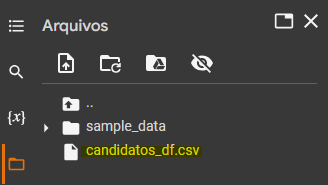

In [ ]:
def convert_valor(valor):
    try:
        return float(re.sub(r'[^\d.]', '', valor))
    except:
        return 0.0

# Aplicar a função de conversão à coluna "Valor em bens"
candidatos_df["Valor em bens"] = candidatos_df["Valor em bens"].apply(convert_valor)

In [ ]:
# Função para converter a quantidade de votos para int
def convert_votos(votos):
    try:
        return int(re.sub(r'\D', '', votos))
    except:
        return 0
candidatos_df["Quantidade de votos"] = candidatos_df["Quantidade de votos"].apply(convert_votos)


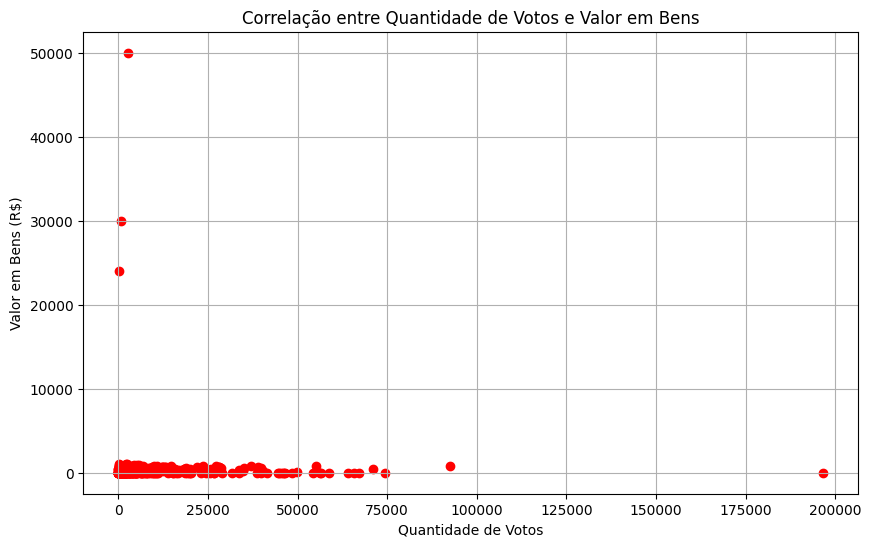

In [ ]:

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(candidatos_df["Quantidade de votos"], candidatos_df["Valor em bens"], color='red')
plt.title("Correlação entre Quantidade de Votos e Valor em Bens")
plt.xlabel("Quantidade de Votos")
plt.ylabel("Valor em Bens (R$)")
plt.grid(True)
plt.show()

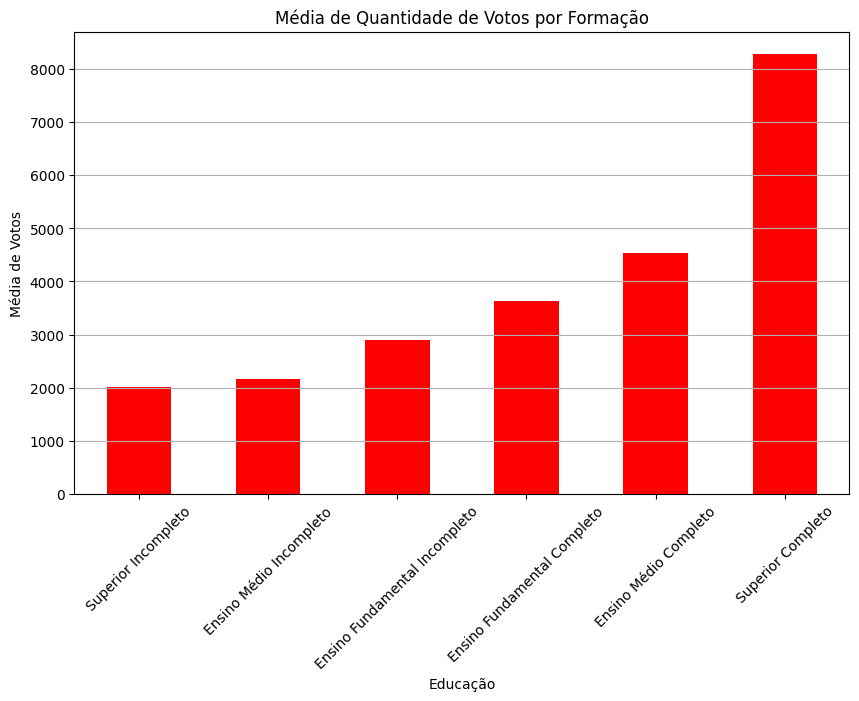

In [ ]:
media_votos_por_formacao = candidatos_df.groupby("Educação")["Quantidade de votos"].mean()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
media_votos_por_formacao.sort_values().plot(kind="bar", color='red')
plt.title("Média de Quantidade de Votos por Formação")
plt.xlabel("Educação")
plt.ylabel("Média de Votos")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

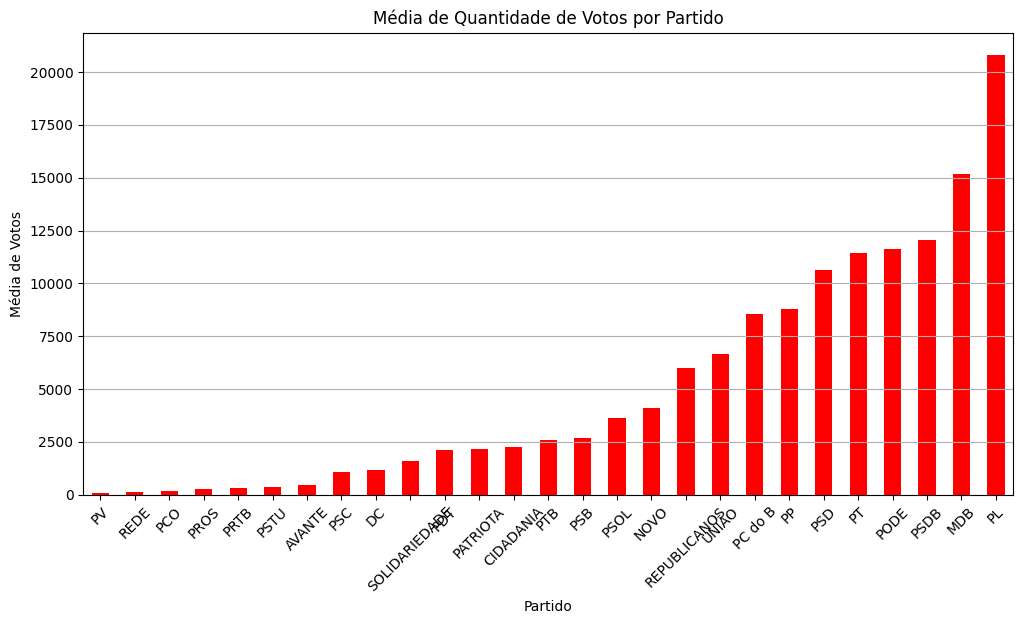

In [ ]:
# Calcular a média de votos por partido
media_votos_por_partido = candidatos_df.groupby("Partido")["Quantidade de votos"].mean()

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
media_votos_por_partido.sort_values().plot(kind="bar", color='red')
plt.title("Média de Quantidade de Votos por Partido")
plt.xlabel("Partido")
plt.ylabel("Média de Votos")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
# Verificar se a coluna "Idade" contém apenas valores numéricos
candidatos_df["Idade"] = pd.to_numeric(candidatos_df["Idade"], errors='coerce')

# Filtrar linhas com valores numéricos na coluna "Idade"
candidatos_df = candidatos_df.dropna(subset=["Idade"])

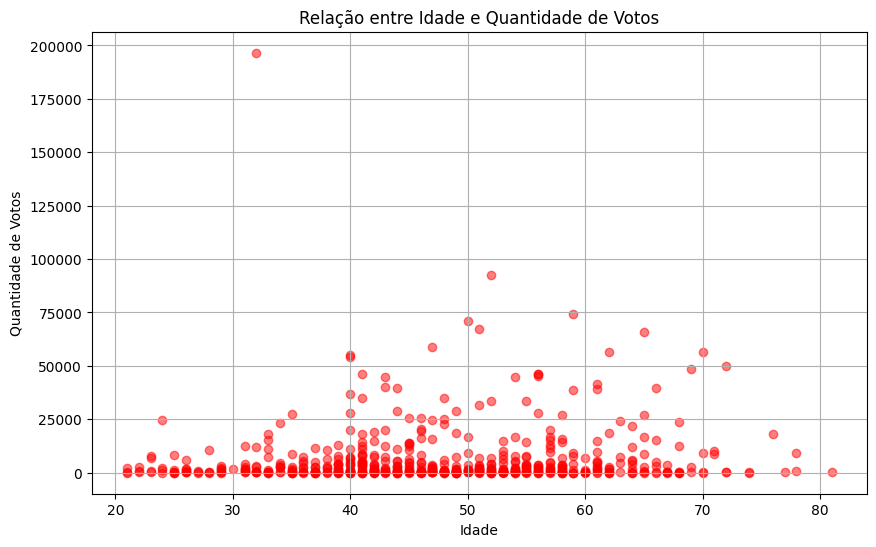

In [ ]:
# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(candidatos_df["Idade"], candidatos_df["Quantidade de votos"], color='red', alpha=0.5)
plt.title("Relação entre Idade e Quantidade de Votos")
plt.xlabel("Idade")
plt.ylabel("Quantidade de Votos")
plt.grid(True)
plt.show()

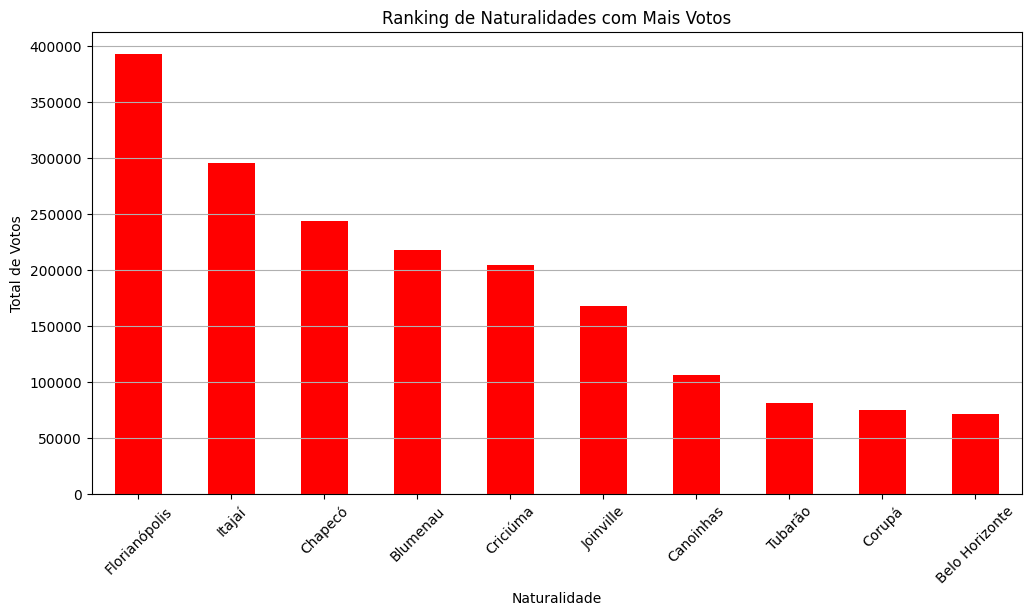

In [ ]:
# Agrupar por naturalidade e somar os votos
ranking_naturalidades = candidatos_df.groupby("Naturalidade")["Quantidade de votos"].sum()

# Ordenar o ranking pela quantidade de votos
ranking_naturalidades = ranking_naturalidades.sort_values(ascending=False)

# Criar o gráfico de barras para o ranking de naturalidades
plt.figure(figsize=(12, 6))
ranking_naturalidades.head(10).plot(kind="bar", color='red')
plt.title("Ranking de Naturalidades com Mais Votos")
plt.xlabel("Naturalidade")
plt.ylabel("Total de Votos")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

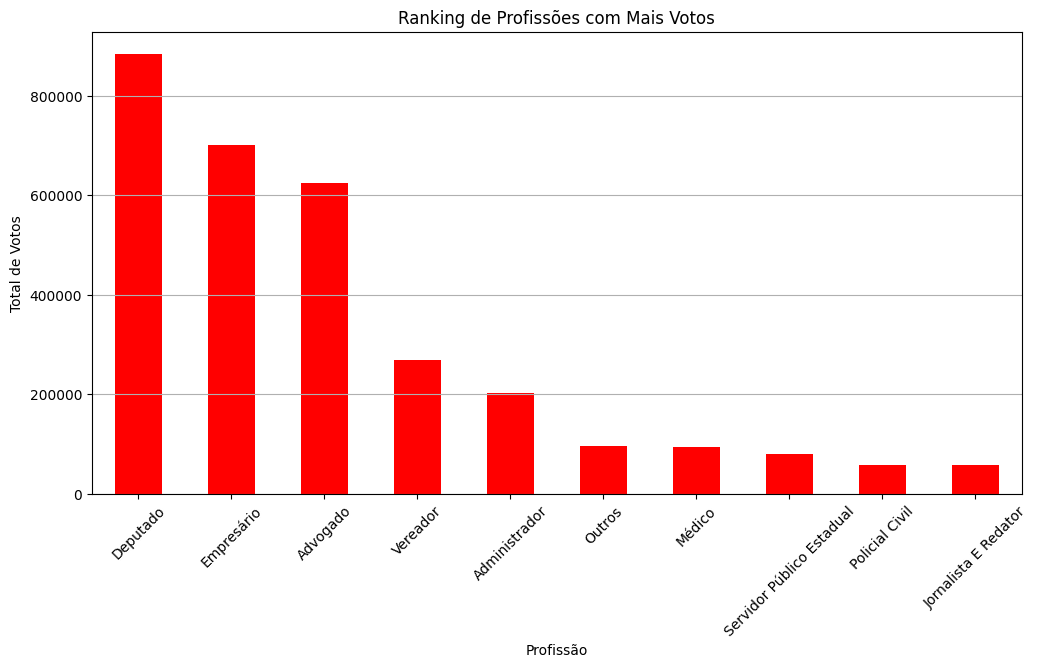

In [ ]:

# Agrupar por profissão e somar os votos
ranking_profissoes = candidatos_df.groupby("Ocupação")["Quantidade de votos"].sum()

# Ordenar o ranking pela quantidade de votos
ranking_profissoes = ranking_profissoes.sort_values(ascending=False)

# Criar o gráfico de barras para o ranking de profissões
plt.figure(figsize=(12, 6))
ranking_profissoes.head(10).plot(kind="bar", color='red')
plt.title("Ranking de Profissões com Mais Votos")
plt.xlabel("Profissão")
plt.ylabel("Total de Votos")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<ipython-input-23-87c862cc353b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidatos_df["Faixa Etária"] = pd.cut(candidatos_df["Idade"], bins=[f[0] for f in faixas_etarias] + [faixas_etarias[-1][-1]], labels=rotulos_faixas)


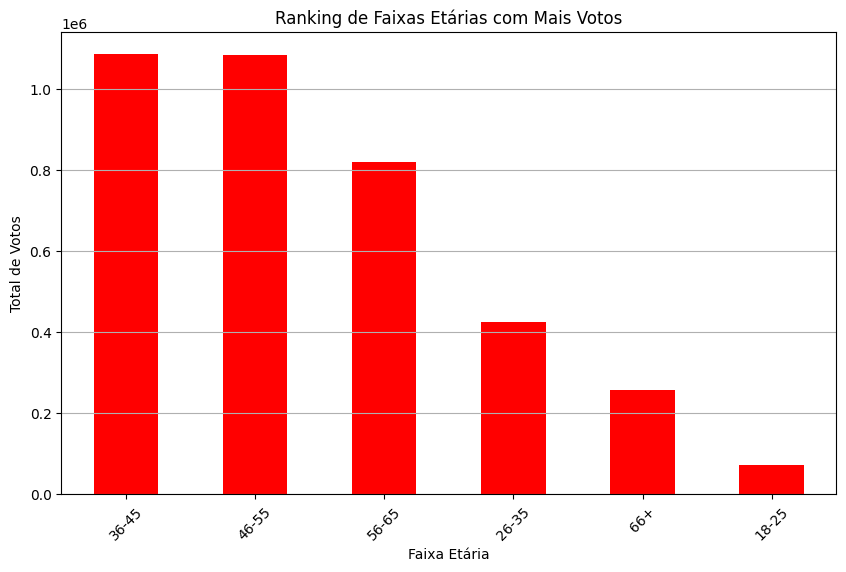

In [ ]:
# Definir as faixas etárias e rótulos
faixas_etarias = [(18, 25), (26, 35), (36, 45), (46, 55), (56, 65), (66, 100)]
rotulos_faixas = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']

# Criar uma nova coluna com a faixa etária correspondente
candidatos_df["Faixa Etária"] = pd.cut(candidatos_df["Idade"], bins=[f[0] for f in faixas_etarias] + [faixas_etarias[-1][-1]], labels=rotulos_faixas)

# Agrupar por faixa etária e somar os votos
ranking_faixas_etarias = candidatos_df.groupby("Faixa Etária")["Quantidade de votos"].sum()

# Ordenar o ranking pela quantidade de votos
ranking_faixas_etarias = ranking_faixas_etarias.sort_values(ascending=False)

# Criar o gráfico de barras para o ranking de faixas etárias
plt.figure(figsize=(10, 6))
ranking_faixas_etarias.plot(kind="bar", color='red')
plt.title("Ranking de Faixas Etárias com Mais Votos")
plt.xlabel("Faixa Etária")
plt.ylabel("Total de Votos")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
# Calcular a média de valores em bens
media_valores_em_bens = candidatos_df["Valor em bens"].mean()

# Adicionar uma coluna indicando se o candidato está acima ou abaixo da média
candidatos_df["Acima da Média"] = candidatos_df["Valor em bens"] > media_valores_em_bens

# Filtrar os candidatos eleitos
candidatos_eleitos = candidatos_df[candidatos_df["Resultado"] == "Eleito"]

# Criar um novo DataFrame com as informações desejadas
resultado_df = candidatos_eleitos[["Nome do candidato", "Valor em bens", "Acima da Média"]]

# Calcular a porcentagem de candidatos eleitos acima da média
porcentagem_acima_media = (resultado_df["Acima da Média"].sum() / len(resultado_df)) * 100

# Imprimir o resultado DataFrame e a porcentagem
print(f"Porcentagem de candidatos eleitos acima da média: {porcentagem_acima_media:.2f}%")


Porcentagem de candidatos eleitos acima da média: 25.64%


<ipython-input-24-242cd8dfad2e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidatos_df["Acima da Média"] = candidatos_df["Valor em bens"] > media_valores_em_bens


In [ ]:
resultado_df

,Nome do candidato,Valor em bens,Acima da Média
0,Ana Campagnolo,0.000,False
1,Luciane Carminatti,749.266,True
2,Antídio Lunelli,0.000,False
3,Sargento Lima,393.000,True
4,Mauro De Nadal,0.000,False
5,Mauricio Eskudlark,0.000,False
7,Paulinha,0.000,False
8,Zé Milton,0.000,False
9,Mario Motta,0.000,False
10,Jessé Lopes,770.772,True


In [ ]:
# Calcular a quantidade de valores em bens zerados e acima de zero
quantidade_bens_zerados = (candidatos_df["Valor em bens"] == 0).sum()
quantidade_bens_acima_zero = (candidatos_df["Valor em bens"] > 0).sum()

# Calcular as porcentagens
porcentagem_bens_zerados = (quantidade_bens_zerados / len(candidatos_df)) * 100
porcentagem_bens_acima_zero = (quantidade_bens_acima_zero / len(candidatos_df)) * 100

# Criar um DataFrame com os resultados
resultado_porcentagem_df = pd.DataFrame({
    "Categoria": ["Bens Zerados", "Bens Acima de Zero"],
    "Quantidade": [quantidade_bens_zerados, quantidade_bens_acima_zero],
    "Porcentagem": [porcentagem_bens_zerados, porcentagem_bens_acima_zero]
})


In [ ]:
resultado_porcentagem_df

,Categoria,Quantidade,Porcentagem
0,Bens Zerados,211,36.254296
1,Bens Acima de Zero,371,63.745704


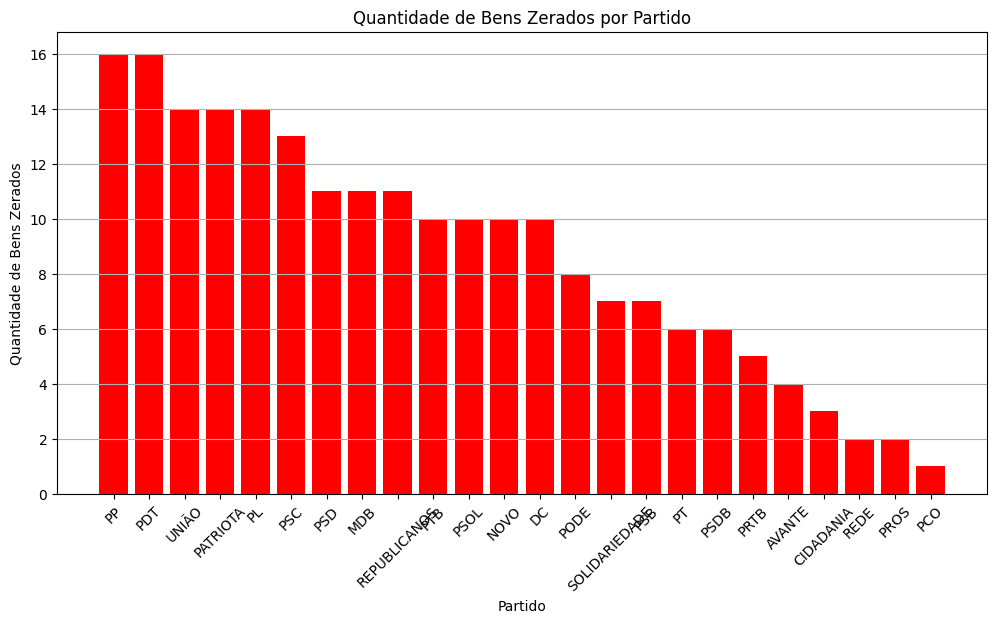

In [ ]:
# Calcular a quantidade de bens zerados por partido
bens_zerados_por_partido = candidatos_df[candidatos_df["Valor em bens"] == 0].groupby("Partido").size().reset_index(name="Quantidade Bens Zerados")

# Ordenar o DataFrame por quantidade de bens zerados
bens_zerados_por_partido = bens_zerados_por_partido.sort_values(by="Quantidade Bens Zerados", ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(bens_zerados_por_partido["Partido"], bens_zerados_por_partido["Quantidade Bens Zerados"], color='red')
plt.title("Quantidade de Bens Zerados por Partido")
plt.xlabel("Partido")
plt.ylabel("Quantidade de Bens Zerados")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
# Exportar o DataFrame para um arquivo JSON com codificação UTF-8
with open("candidatos_estaduais.json", "w", encoding="utf-8") as json_file:
    json.dump(candidatos_df.to_dict(orient="records"), json_file, ensure_ascii=False, indent=4)